Title: 
    
Analysis of Algerian Forest Fires: An Inferential Explanation of Possible Correlation.

Introduction: 

Large sections of forest are destroyed everyday by forest fires. Not only do these types of natural disasters destroy the trees but they also exterminate and displace wildlife within the threatened ecosystem. Consequently, it would be of great beneficence to be able to pinpoint major factors(atmospheric conditions) contributing to these phenomena(forest fires) and allow for possible combatant scaffolding to be deduced.  The following research will examine a dataset (“Algerian_forest_fires_dataset_UPDATE.csv”) that contains a total of 244 instances of forest fires in two regions of Algeria(Bejaia region and Sidi Bel-abbes region) that were gathered between June and September of 2012. Since the most predominant cause of forest fires is lightning on dry trees and soil in low moisture conditions. To begin we will compare the "RH" column to “Temperature” column. We will analyze each variable to see if there is a correlation between that variable and the possible outcome of fire with respect to RH. 

Preliminary exploratory data analysis:

First we load the necessary libraries

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library("readxl")
library(tidymodels)
library(lubridate)
library(ggplot2)
library(forcats)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

The dataset can be read into R using the following read_csv function:Forest_fire <- read.csv("Project/Algerian_forest_fires_dataset_UPDATE.csv", skip=1), however, the dataset is actually consisting of 2 tables and we decided to separate it into two csv files. Hence we would use Bejaia <- read.csv("Bejaia.csv", skip=1), and Sidi_Bel_Abbes <- read_csv("Sidi_Bel_Abbes.csv", skip=1). We also mutate the Class column containing "Fire" or "Not Fire" to wrangle it into a classification model. Pulled levels as well to determine how many classes we had in each dataset.

In [2]:
id_Bej <- "1zby9kC_wgi3bpMBtvgZACrDTMxZY3MXa" # google file ID
Bejaia <- read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id_Bej),skip = 1)

id_SBA <-"1H8TMtO7zSFH80RUYPZbzqEbm207hqe72"
Sidi_Bel_Abbes<-read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id_SBA),skip = 1)

Bejaia%>%
   mutate(Class=as_factor(Classes)) %>%
    pull(Class)%>% 
    levels()

Sidi_Bel_Abbes%>%
   mutate(Classes=as_factor(Classes)) %>%
    pull(Classes)%>% 
    levels()

head(Bejaia)
head(Sidi_Bel_Abbes)

Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_double(),
  Classes = col_character()
)

Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_character(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_character(),
  Classes = col_character()
)



[1] "not fire" "fire"

[1] "not fire" "fire"

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


In [3]:
set.seed(1)

In [4]:
bejaia<- Bejaia %>%       
    mutate(Class=as_factor(Classes)) %>%
    select(-Classes)   

We wanted to see how many rows the Bejaia dataset had as well as the percentage of each class in the dataset.

In [5]:
num_obs_bejaia <- nrow(bejaia)
bejaia_class_counts <- bejaia %>%
      group_by(Class) %>%
      summarize(n = n(),percentage = n() / num_obs_bejaia * 100)
bejaia_class_counts

`summarise()` ungrouping output (override with `.groups` argument)



Class,n,percentage
<fct>,<int>,<dbl>
not fire,63,51.63934
fire,59,48.36066


The Sidi_Bel_Abbes data set had a single row without a class so we removed that row here. Some of its variables were not numeric originally so we converted them here.

In [6]:
Sidi_Bel_Abbes <- Sidi_Bel_Abbes %>% 
    filter(Classes != "NA") %>% 
    mutate(Classes= as_factor(Classes))%>%
    mutate(FWI=as.numeric(FWI)) %>%
    mutate(DC=as.numeric(DC))

Repeat the same code to count the rows for the Sidi Bel Abbes dataset.

In [7]:
num_obs_sidi <- nrow(Sidi_Bel_Abbes)
sidi_bel_abbes_class_counts <- Sidi_Bel_Abbes %>%
      group_by(Classes) %>%
      summarize(
      n = n(),
      percentage = n() / num_obs_sidi * 100)
sidi_bel_abbes_class_counts

`summarise()` ungrouping output (override with `.groups` argument)



Classes,n,percentage
<fct>,<int>,<dbl>
not fire,43,35.53719
fire,78,64.46281


We decide to split the dataset into one training set and one testing set, with a 1:1 proportion. We discovered that the accuracy acctually increased overall when we balanced the proportions more evenly. We suspect this happens because our datasets are quite small. If our testing proportion is too small random points have a much larger impact on the accuracy of the model.

In [8]:
Sidi_Bel_Abbes_split<- initial_split(Sidi_Bel_Abbes, prop = 0.50, strata = Classes)  
Sidi_Bel_Abbes_train <- training(Sidi_Bel_Abbes_split)   
Sidi_Bel_Abbes_test <- testing(Sidi_Bel_Abbes_split)
head(Sidi_Bel_Abbes_train)     
head(Sidi_Bel_Abbes_test)

Bejaia_split<- initial_split(bejaia, prop = 0.50, strata = Class)  
Bejaia_train <- training(Bejaia_split)   
Bejaia_test <- testing(Bejaia_split)
head(Bejaia_train)
head(Bejaia_test)

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire
10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire
11,6,2012,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,fire
12,6,2012,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire
9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
11,6,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire
17,6,2012,30,89,16,0.6,37.3,1.1,7.8,0.0,1.6,0.0,not fire


The following cell plots out all the variables with respect to RH and colored by class.

In [9]:
Sidi_Bel_Abbes_Tem <- Sidi_Bel_Abbes_train %>% 
    select(Temperature, RH, Classes) %>%
    ggplot(aes(x=Temperature, y= RH, color = Classes))+
    geom_point()+
    xlab("Temperature")+
    ylab("Relative Humidity")+
    labs(title="Figure 1:Sidi Bel Abbes Relative Humidity vs Temperature") +
    scale_color_manual (values=c("fire"="tomato","not fire"="skyblue2"))

Bejaia_Tem <- Bejaia_train %>% 
    select(Temperature, RH, Class)%>%
    ggplot(aes(x=Temperature, y= RH, color = Class))+
    geom_point()+
    xlab("Temperature")+
    ylab("Relative Humidity")+
    labs(title="Figure 2:Bejaia Relative Humidity vs Temperature") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_FFMC <- Sidi_Bel_Abbes_train %>% 
    select(RH,FFMC,Classes) %>%
    ggplot(aes(x=FFMC,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fine Fuel Moisture Code", title="Figure 3:RH vs Fine Fuel Moisture (SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato","not fire"="skyblue2"))

Bejaia_RH_FFMC <- Bejaia_train %>%
    select(RH, Class, FFMC) %>%
    ggplot(aes(x=FFMC,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fine Fuel Moisture Code",title="Figure 4:RH vs Fine Fuel Moisture Code (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_DMC <- Sidi_Bel_Abbes_train%>% 
    select(RH,DMC,Classes) %>%
    ggplot(aes(x=DMC,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Duff Moisture Code",title="Figure 5:RH vs Duff Moisture Code (SIDI BEL ABBES)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_RH_DMC <- Bejaia_train %>%
    select(RH, Class, DMC) %>%   
    ggplot(aes(x=DMC,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Duff Moisture Code",title="Figure 6:RH vs Duff Moisture Code (BEJAIA)")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_Ws <- Sidi_Bel_Abbes_train %>% 
    select(Ws, RH, Classes)%>%
    ggplot(aes(x=Ws, y= RH, color = Classes))+
    geom_point()+
    xlab("Wind Speed")+
    ylab("Relative Humidity")+
    labs(title="Figure 7:Sidi Bel Abbes Relative Humidity vs Wind Speed") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_Ws <- Bejaia_train %>% 
    select(Ws, RH, Class)%>%
    ggplot(aes(x=Ws, y= RH, color = Class))+
    geom_point()+
    xlab("Wind Speed")+
    ylab("Relative Humidity")+
    labs(title="Figure 8:Bejaia Relative Humidity vs Wind Speed") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_FWI <- Sidi_Bel_Abbes_train%>% 
    select(RH,FWI,Classes) %>%
    ggplot(aes(x=FWI,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fire Weather Index", title="Figure 9:RH vs Fire Weather Index(SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2")) 

Bejaia_RH_FWI <- Bejaia_train %>%
    select(FWI, Class, RH) %>%
    ggplot(aes(x=FWI,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fire Weather Index",title="Figure 10:RH vs Fire Weather Index(Bejaia)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_Rain <- Sidi_Bel_Abbes_train%>% 
    select(RH,Rain,Classes) %>%
    ggplot(aes(x=Rain,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Rain", title="Figure 11:RH vs Rain (SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato",  "not fire"="skyblue2"))

Bejaia_RH_Rain <- Bejaia_train %>%
    select(RH, Class, Rain) %>%
    ggplot(aes(x=Rain,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Rain",title="Figure 12:RH vs Rain (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_BUI <- Sidi_Bel_Abbes_train%>% 
    select(RH,BUI,Classes) %>%
    ggplot(aes(x=BUI,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Build Up Index", title="Figure 13:RH vs Build Up Index(SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_RH_BUI <- Bejaia_train %>%
    select(RH, Class, BUI) %>%
    ggplot(aes(x=BUI,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Build Up Index",title="Figure 14:RH vs Build Up Index (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_DC <- Sidi_Bel_Abbes_train %>% 
    select(DC, RH, Classes)%>%
    filter(Classes != "NA") %>%
    ggplot(aes(x=DC, y= RH, color = Classes))+
    geom_point()+
    xlab("Drought Code Index")+
    ylab("Relative Humidity")+
    labs(title="Figure 15:Sidi Bel Abbes Relative Humidity vs Drought Code Index") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_DC <- Bejaia_train %>% 
    select(DC, RH, Class)%>%
    filter(Class != "NA") %>%
    filter(Class != '') %>%
    ggplot(aes(x=DC, y= RH, color = Class))+
    geom_point()+
    xlab("Drought Code Index")+
    ylab("Relative Humidity")+
    labs(title="Figure 16:Bejaia Relative Humidity vs Drought Code Index") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_ISI <- Sidi_Bel_Abbes_train %>% 
    select(ISI, RH, Classes)%>%
    ggplot(aes(x=ISI, y= RH, color = Classes))+
    geom_point()+
    xlab("Initial Spread Index")+
    ylab("Relative Humidity")+
    labs(title="Figure 17:Sidi Bel Abbes Relative Humidity vs Initial Spread Index")+
    scale_color_manual (values=c("fire"="tomato","not fire"="skyblue2"))

Bejaia_ISI <- Bejaia_train %>% 
    select(ISI, RH, Class)%>%
    ggplot(aes(x=ISI, y= RH, color = Class))+
    geom_point()+
    xlab("Initial Spread Index")+
    ylab("Relative Humidity")+
    labs(title="Figure 18:Bejaia Relative Humidity vs Initial Spread Index")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

The next series of cells plot each variable side by side to visualize the best five variables to pick. 

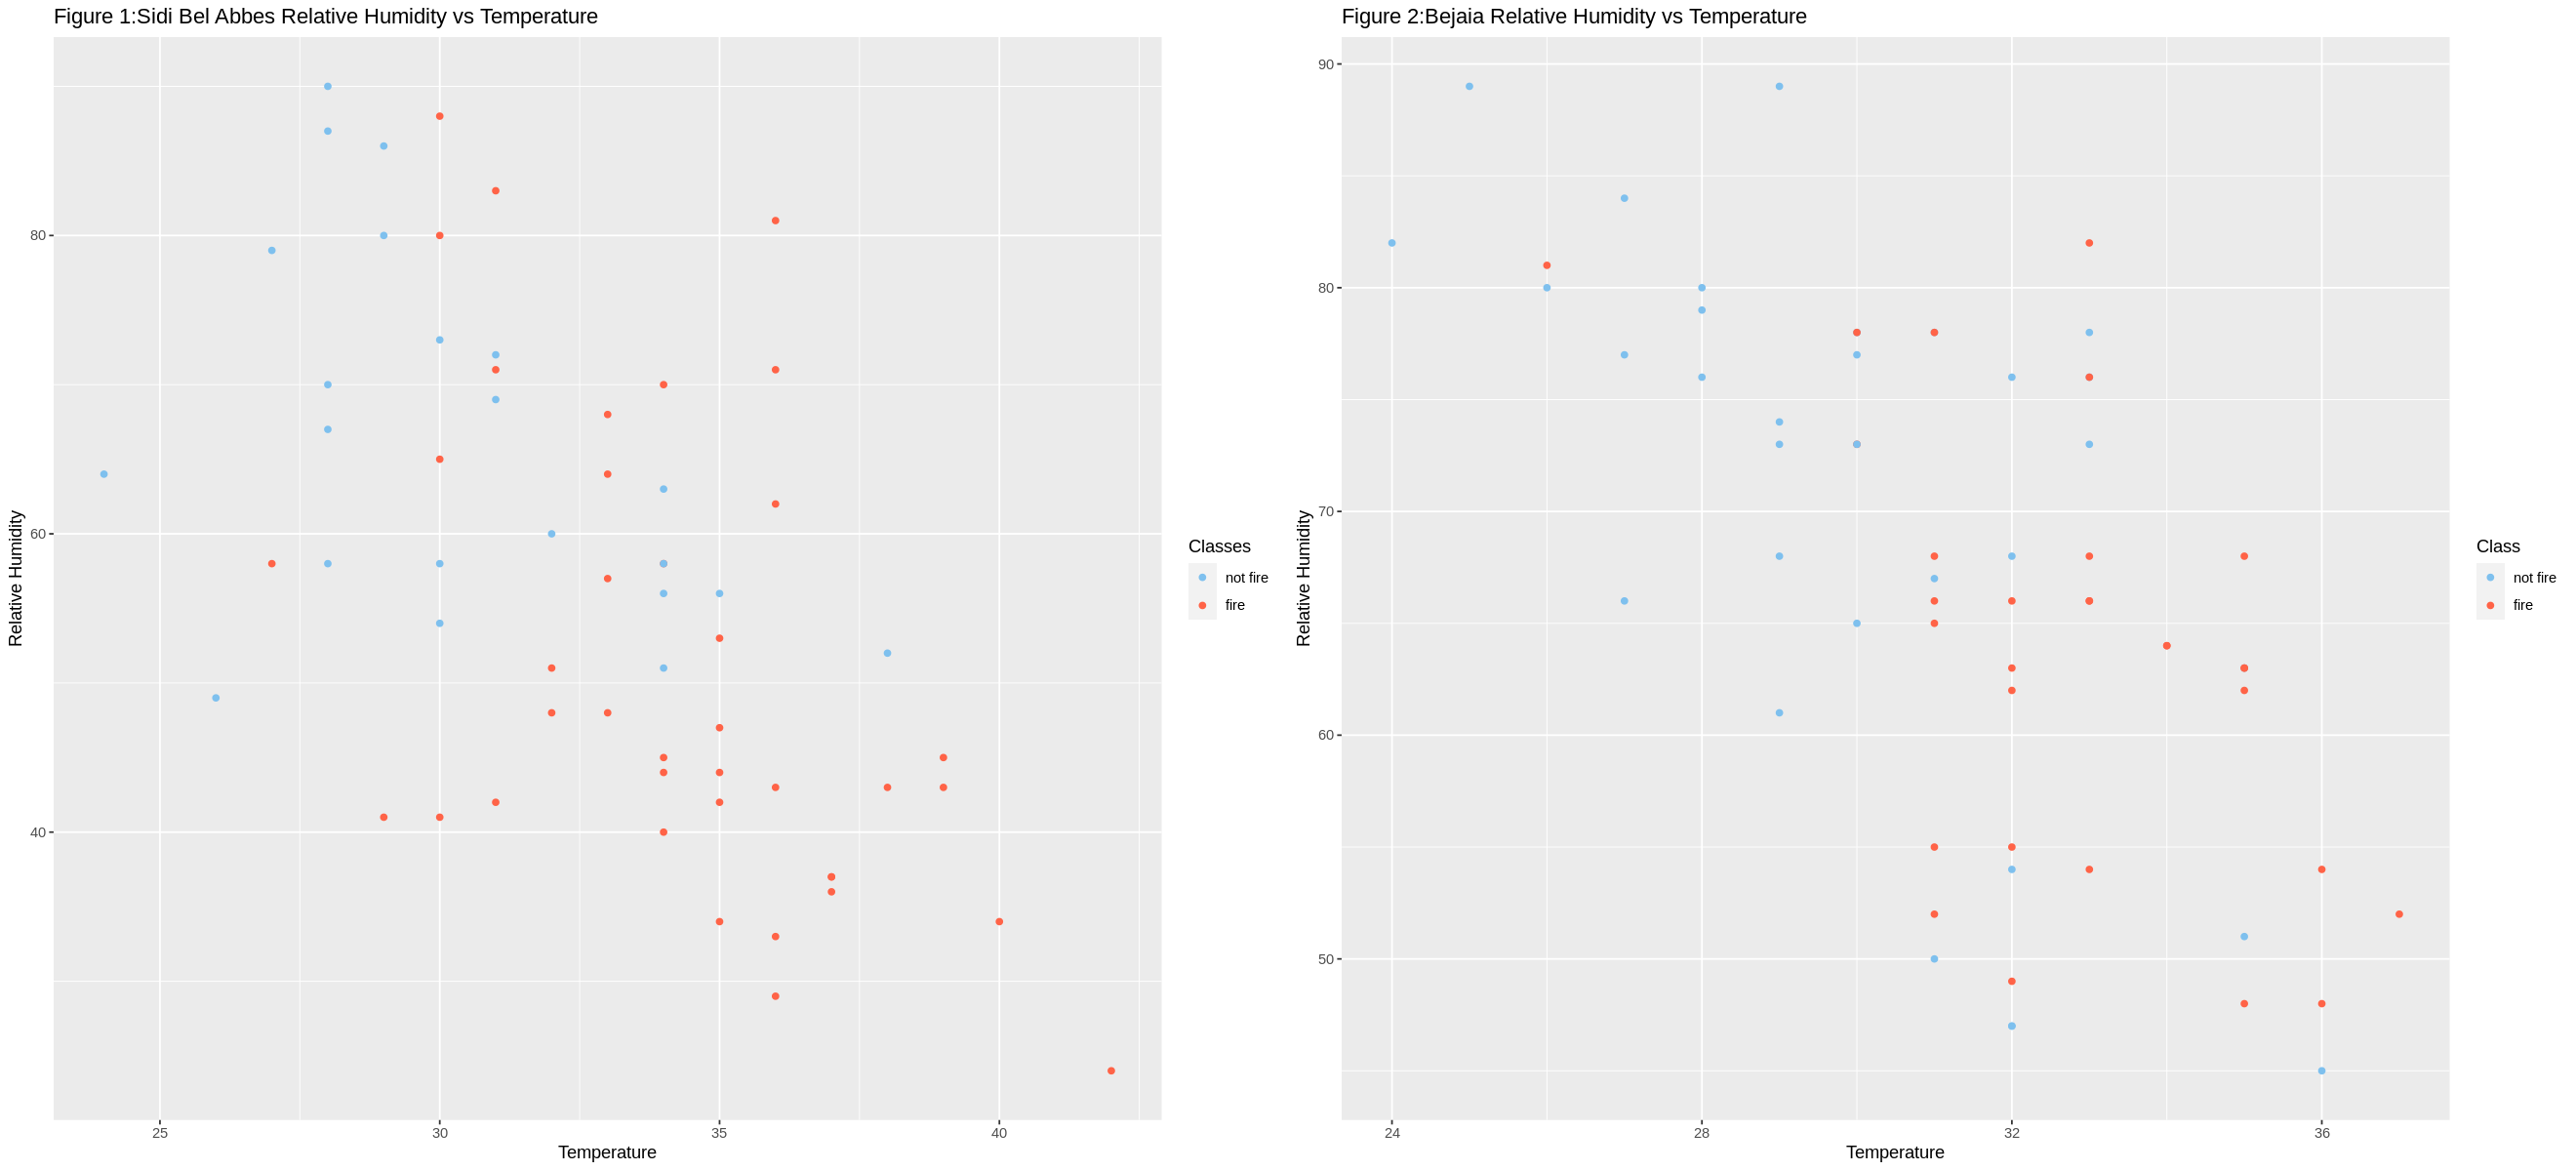

In [10]:
options(repr.plot.width = 22, repr.plot.height = 10)
Temp_plots <- plot_grid(Sidi_Bel_Abbes_Tem, Bejaia_Tem)
Temp_plots

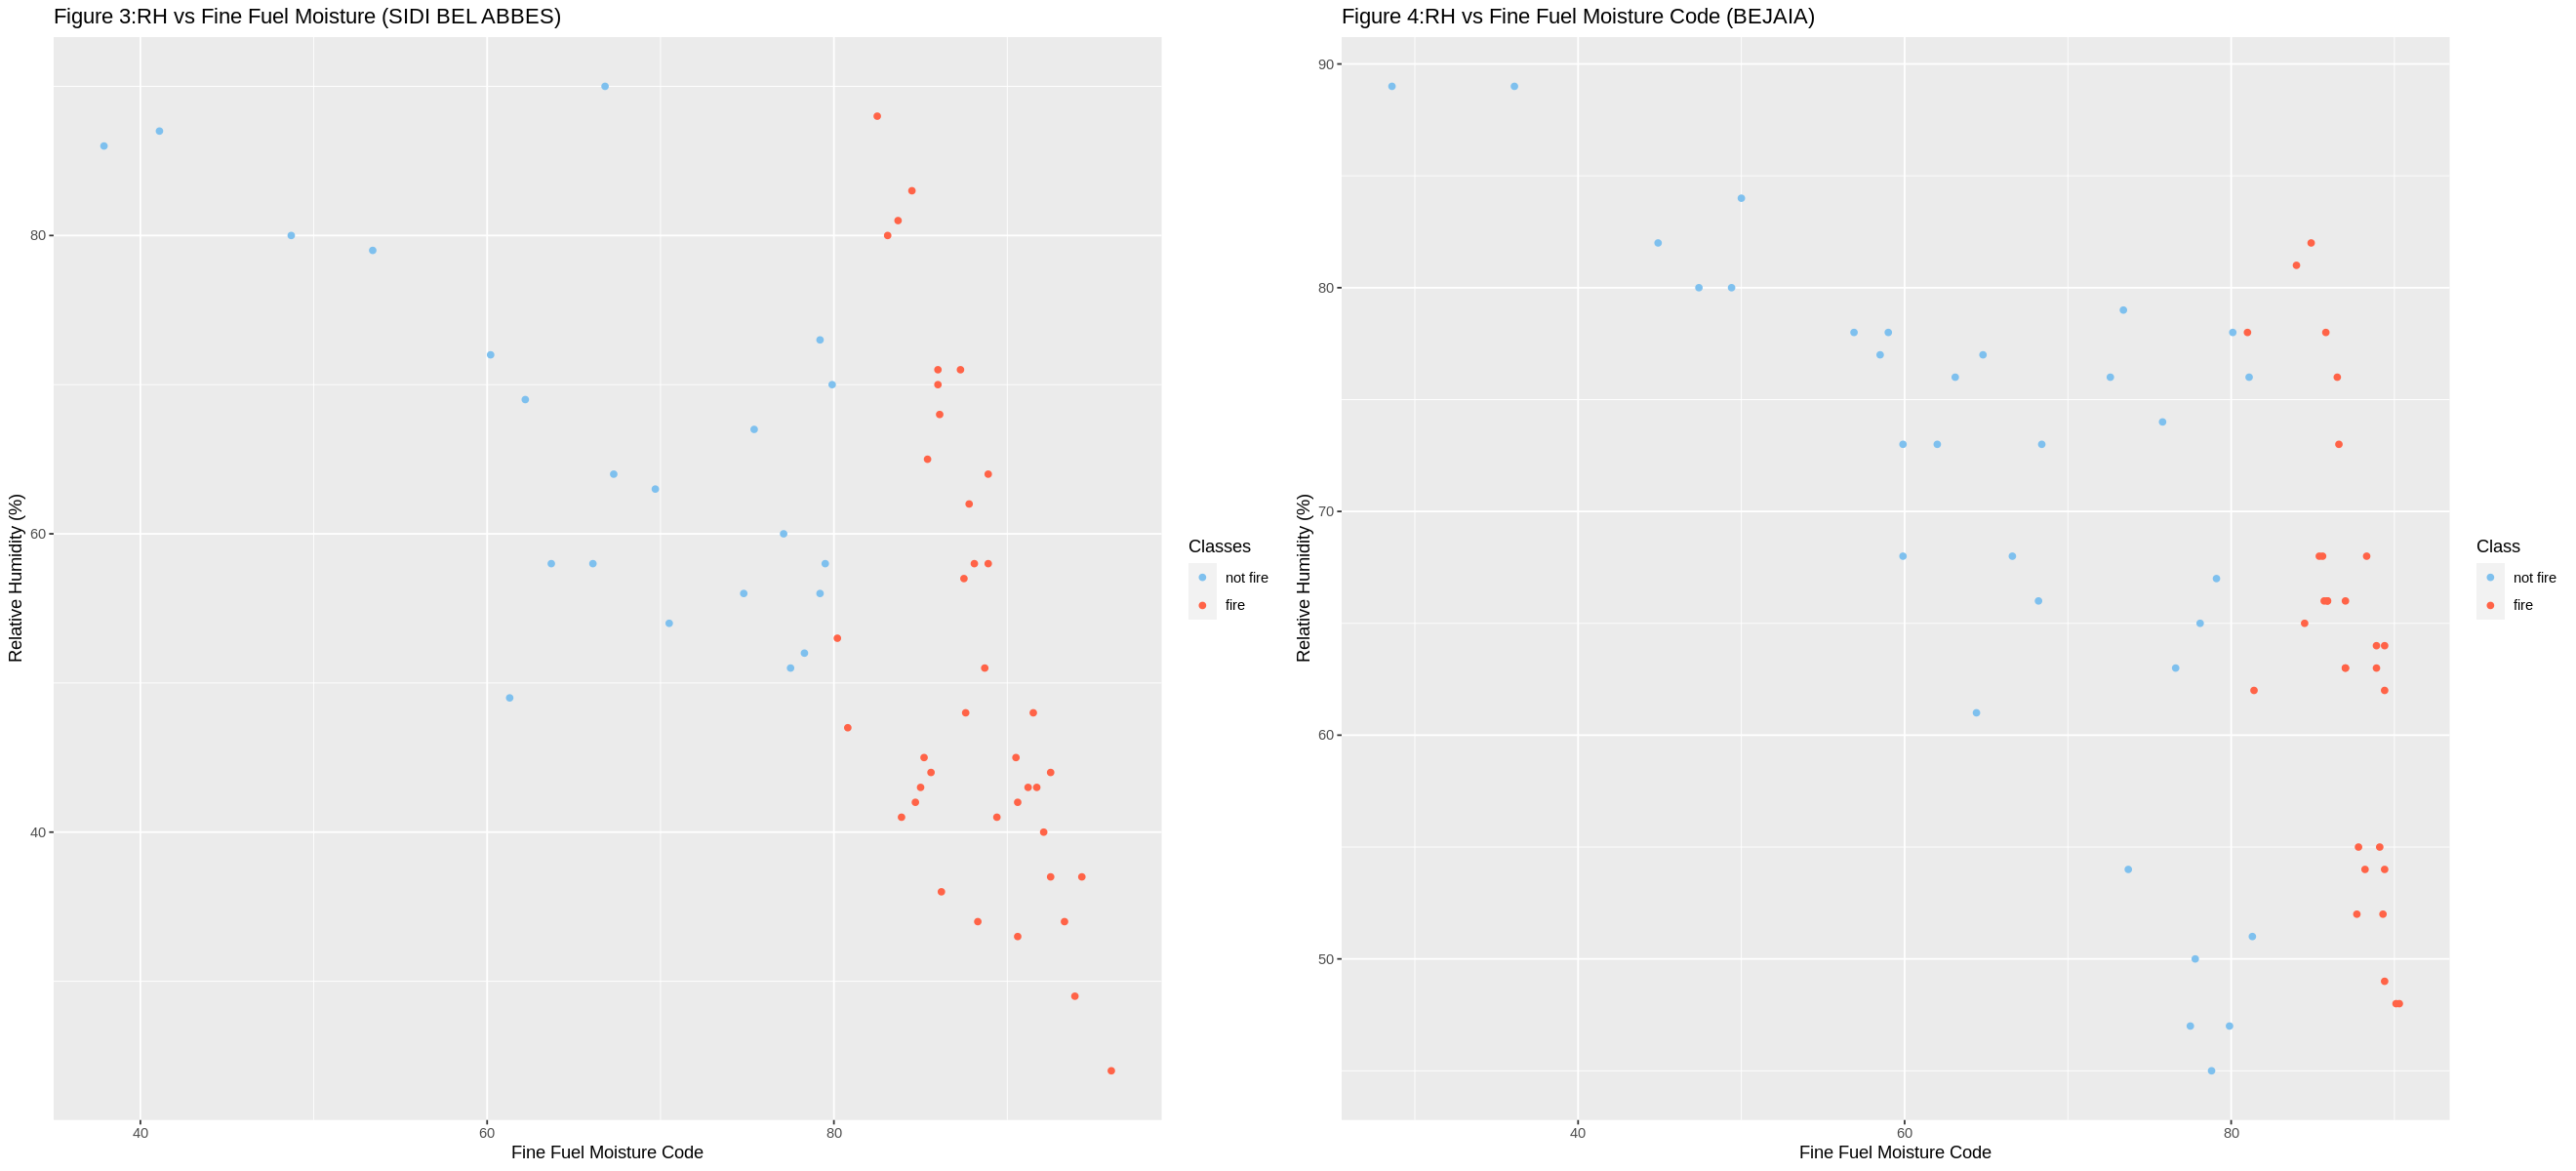

In [11]:
options(repr.plot.width = 22, repr.plot.height = 10)
FFMC_plots <- plot_grid(Sidi_Bel_Abbes_RH_FFMC, Bejaia_RH_FFMC)
FFMC_plots

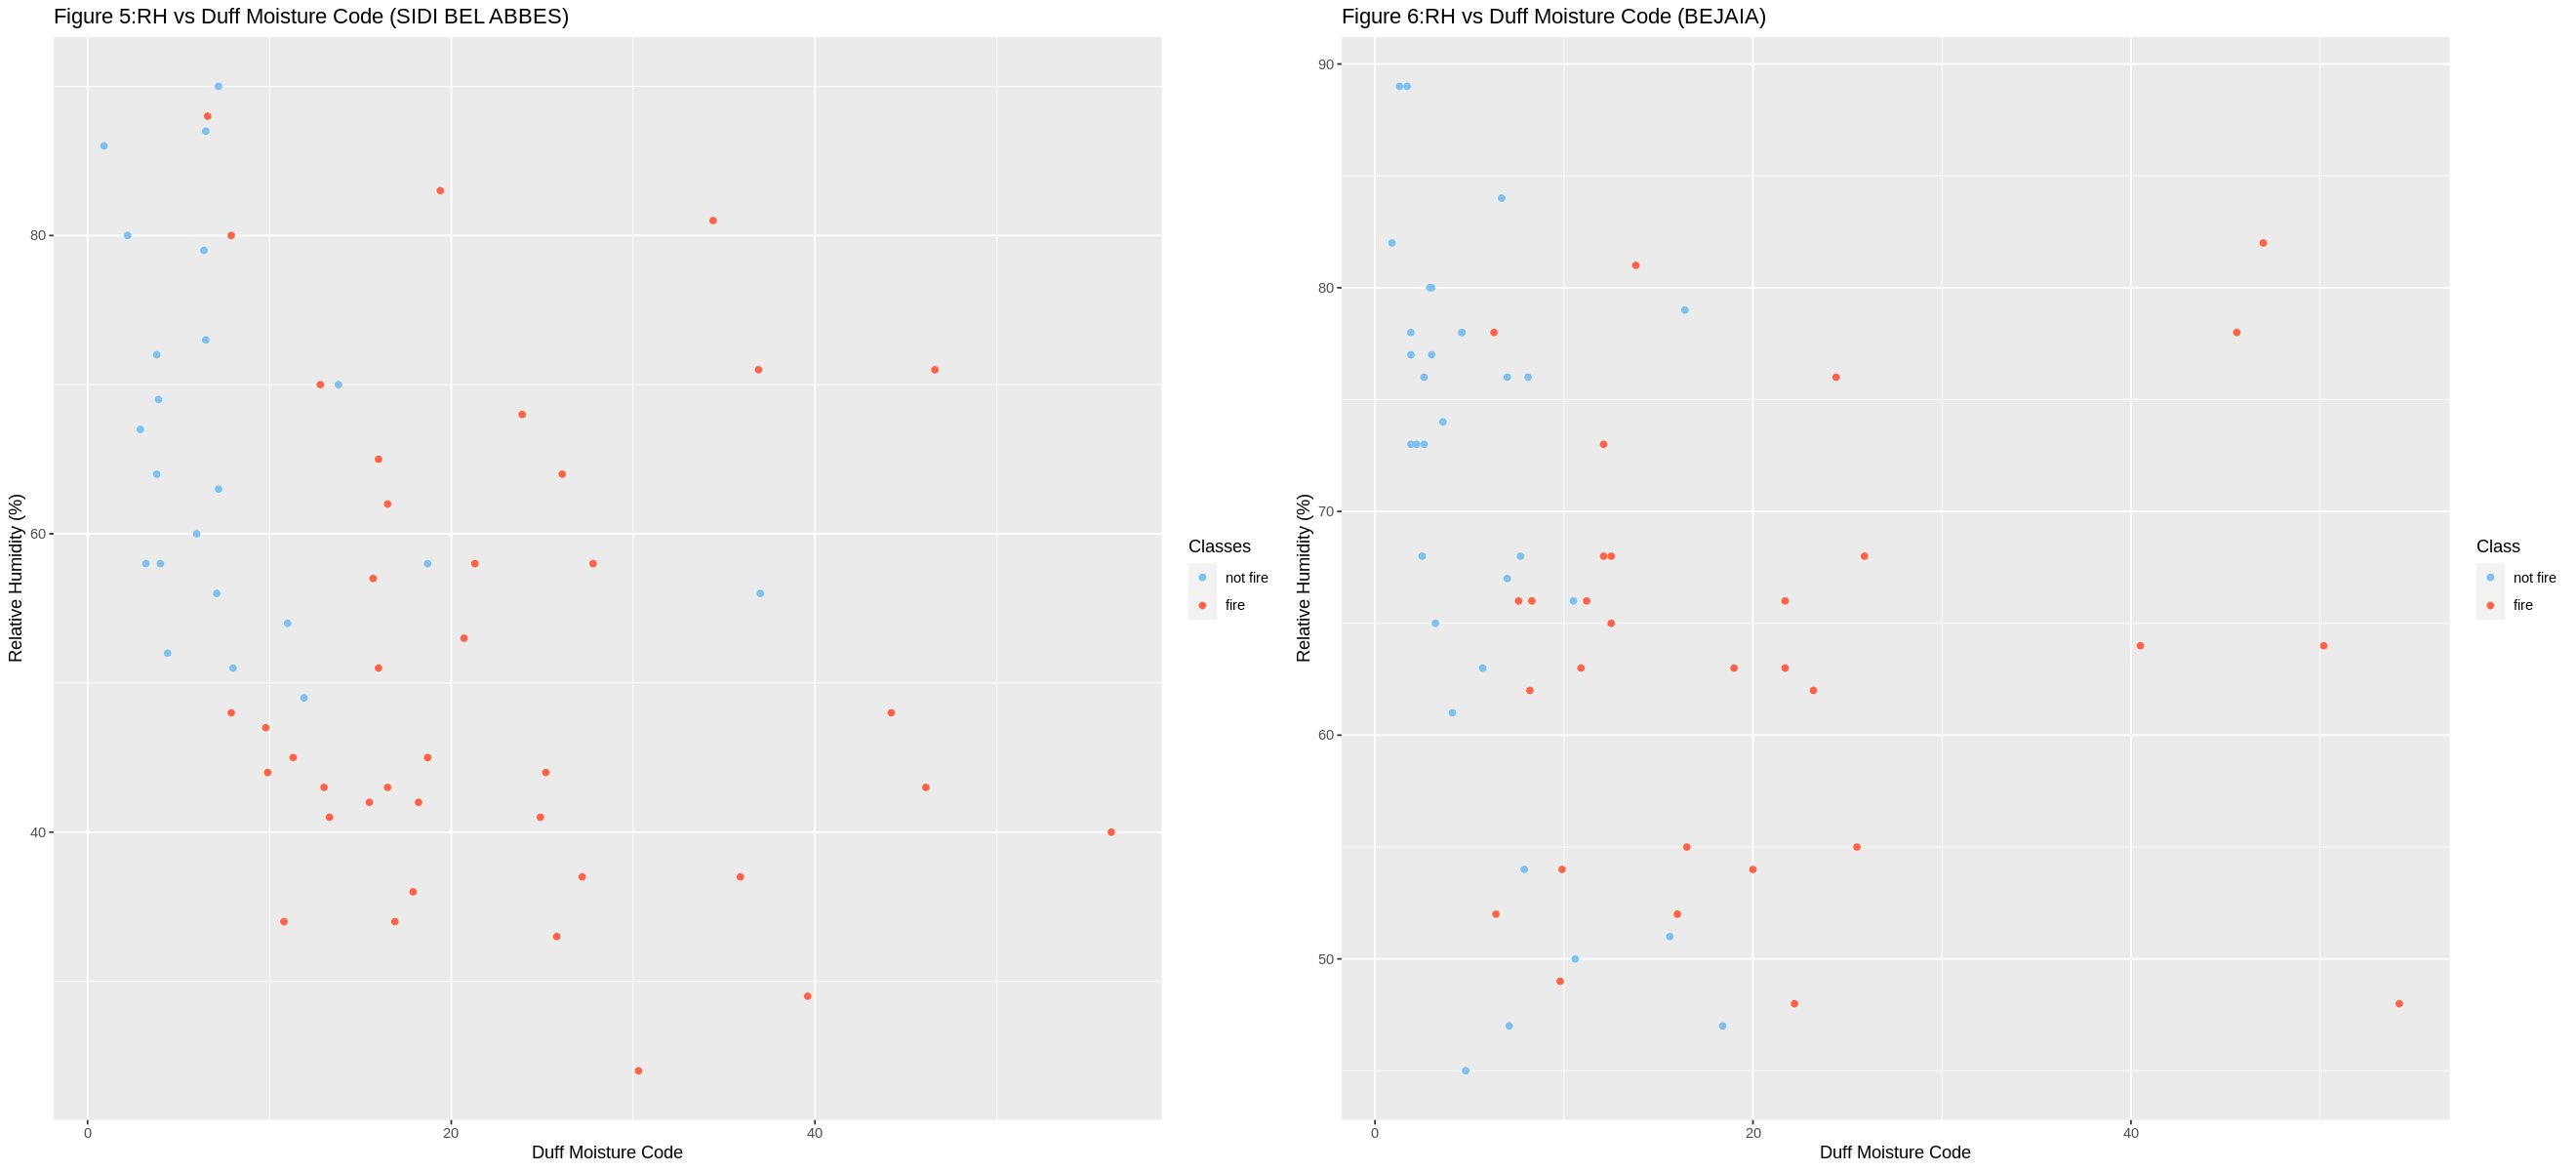

In [12]:
options(repr.plot.width = 22, repr.plot.height = 10)
DMC_plots <- plot_grid(Sidi_Bel_Abbes_RH_DMC, Bejaia_RH_DMC)
DMC_plots

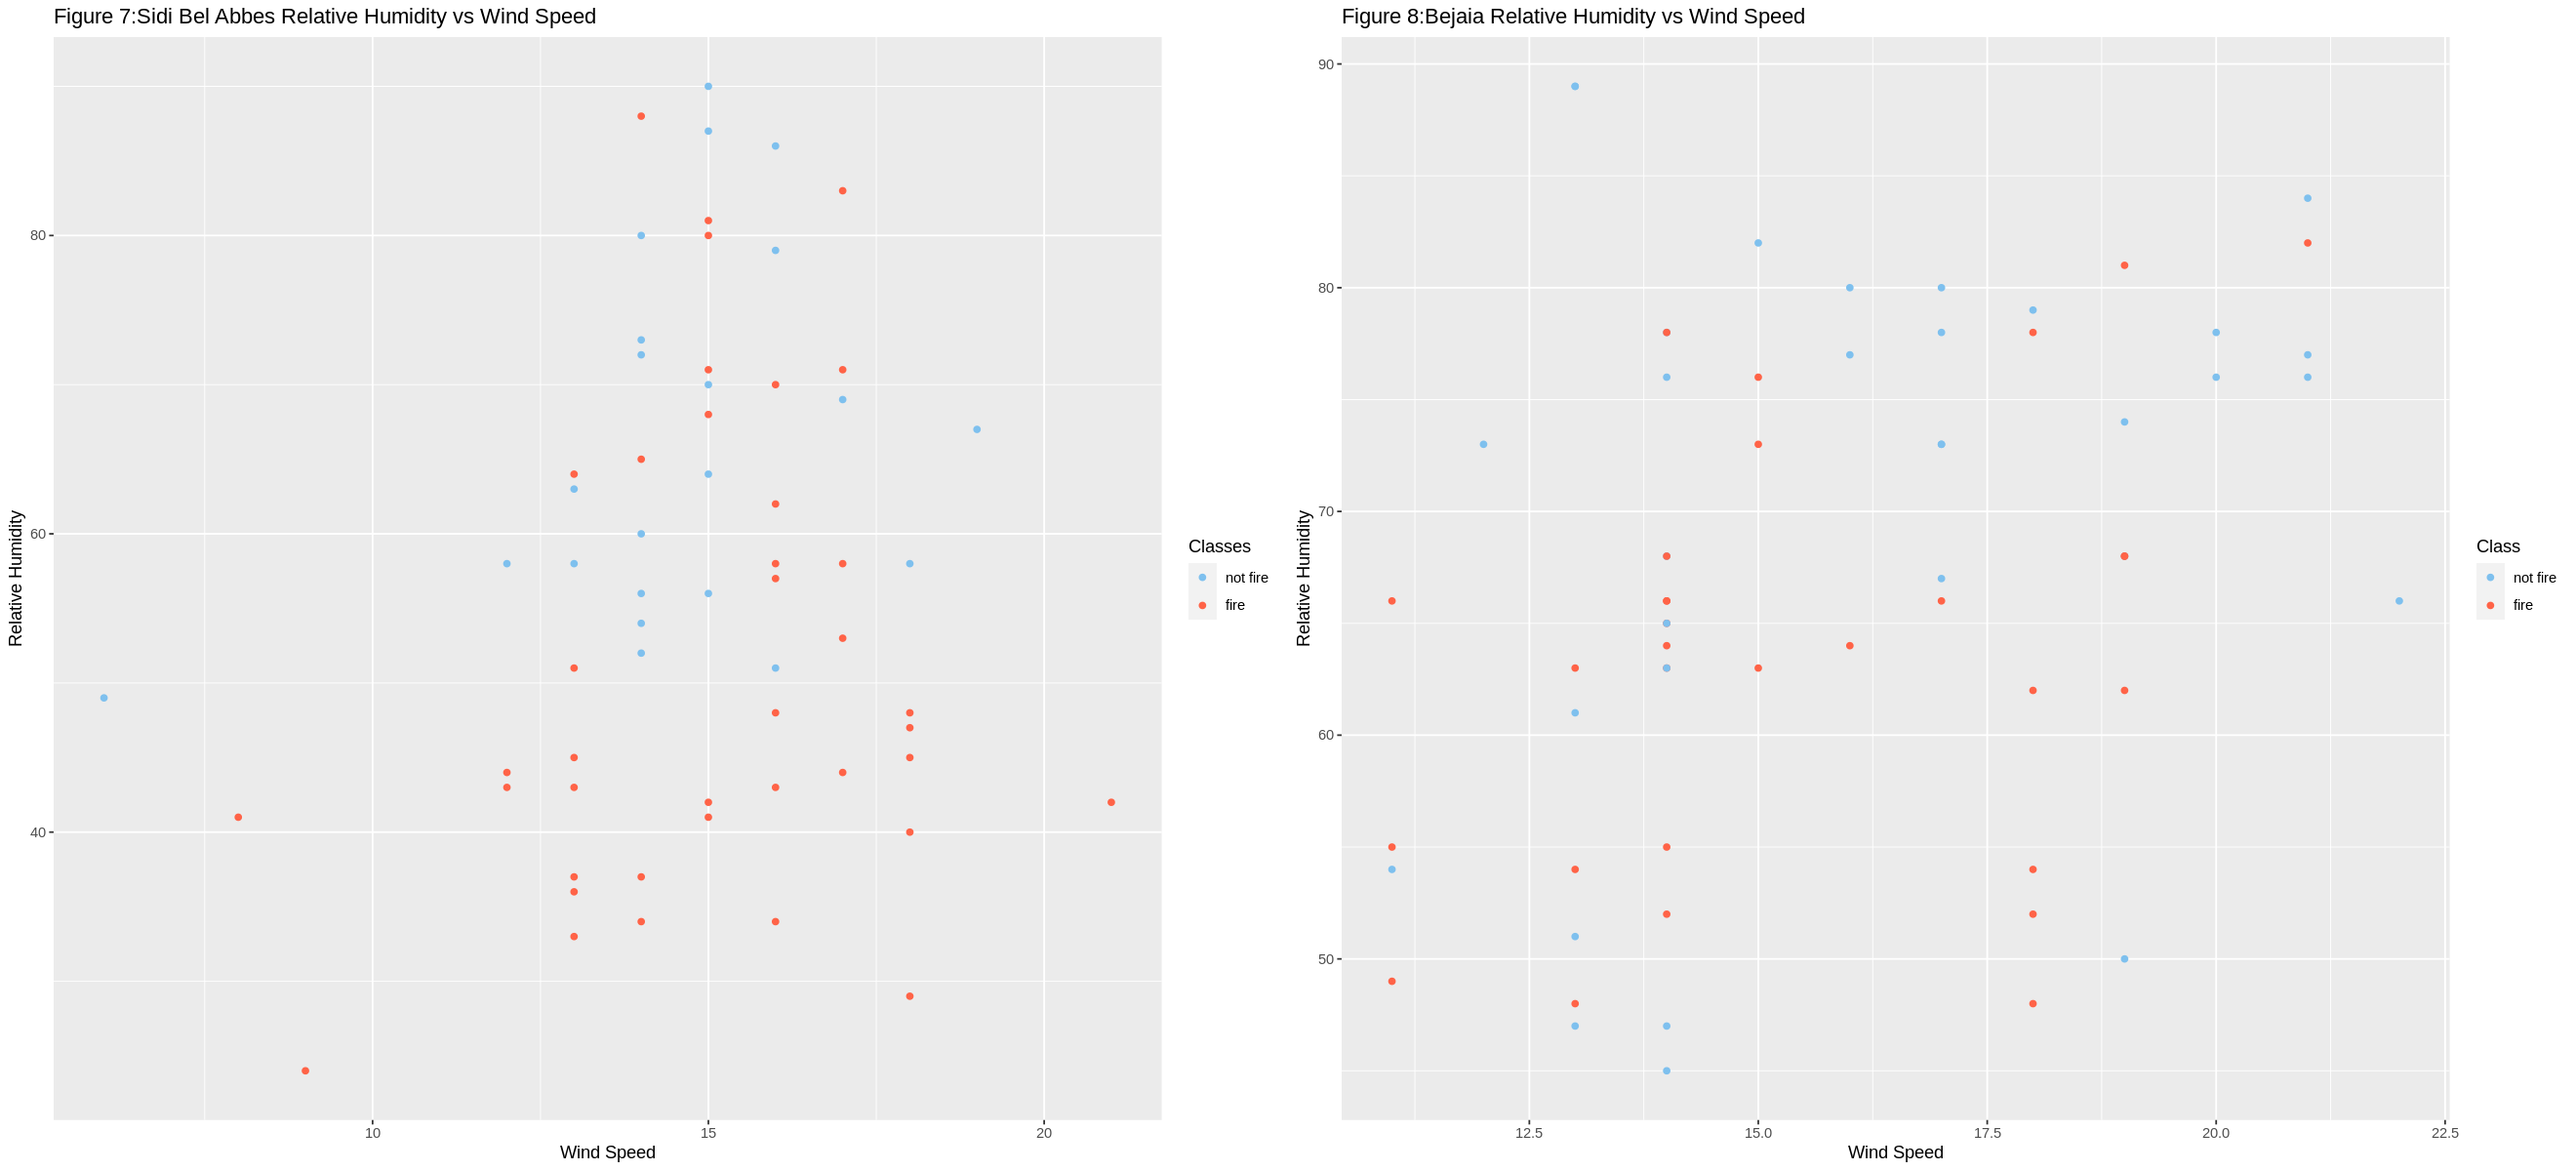

In [13]:
options(repr.plot.width = 22, repr.plot.height = 10)
WS_plots <- plot_grid(Sidi_Bel_Abbes_Ws, Bejaia_Ws)
WS_plots  

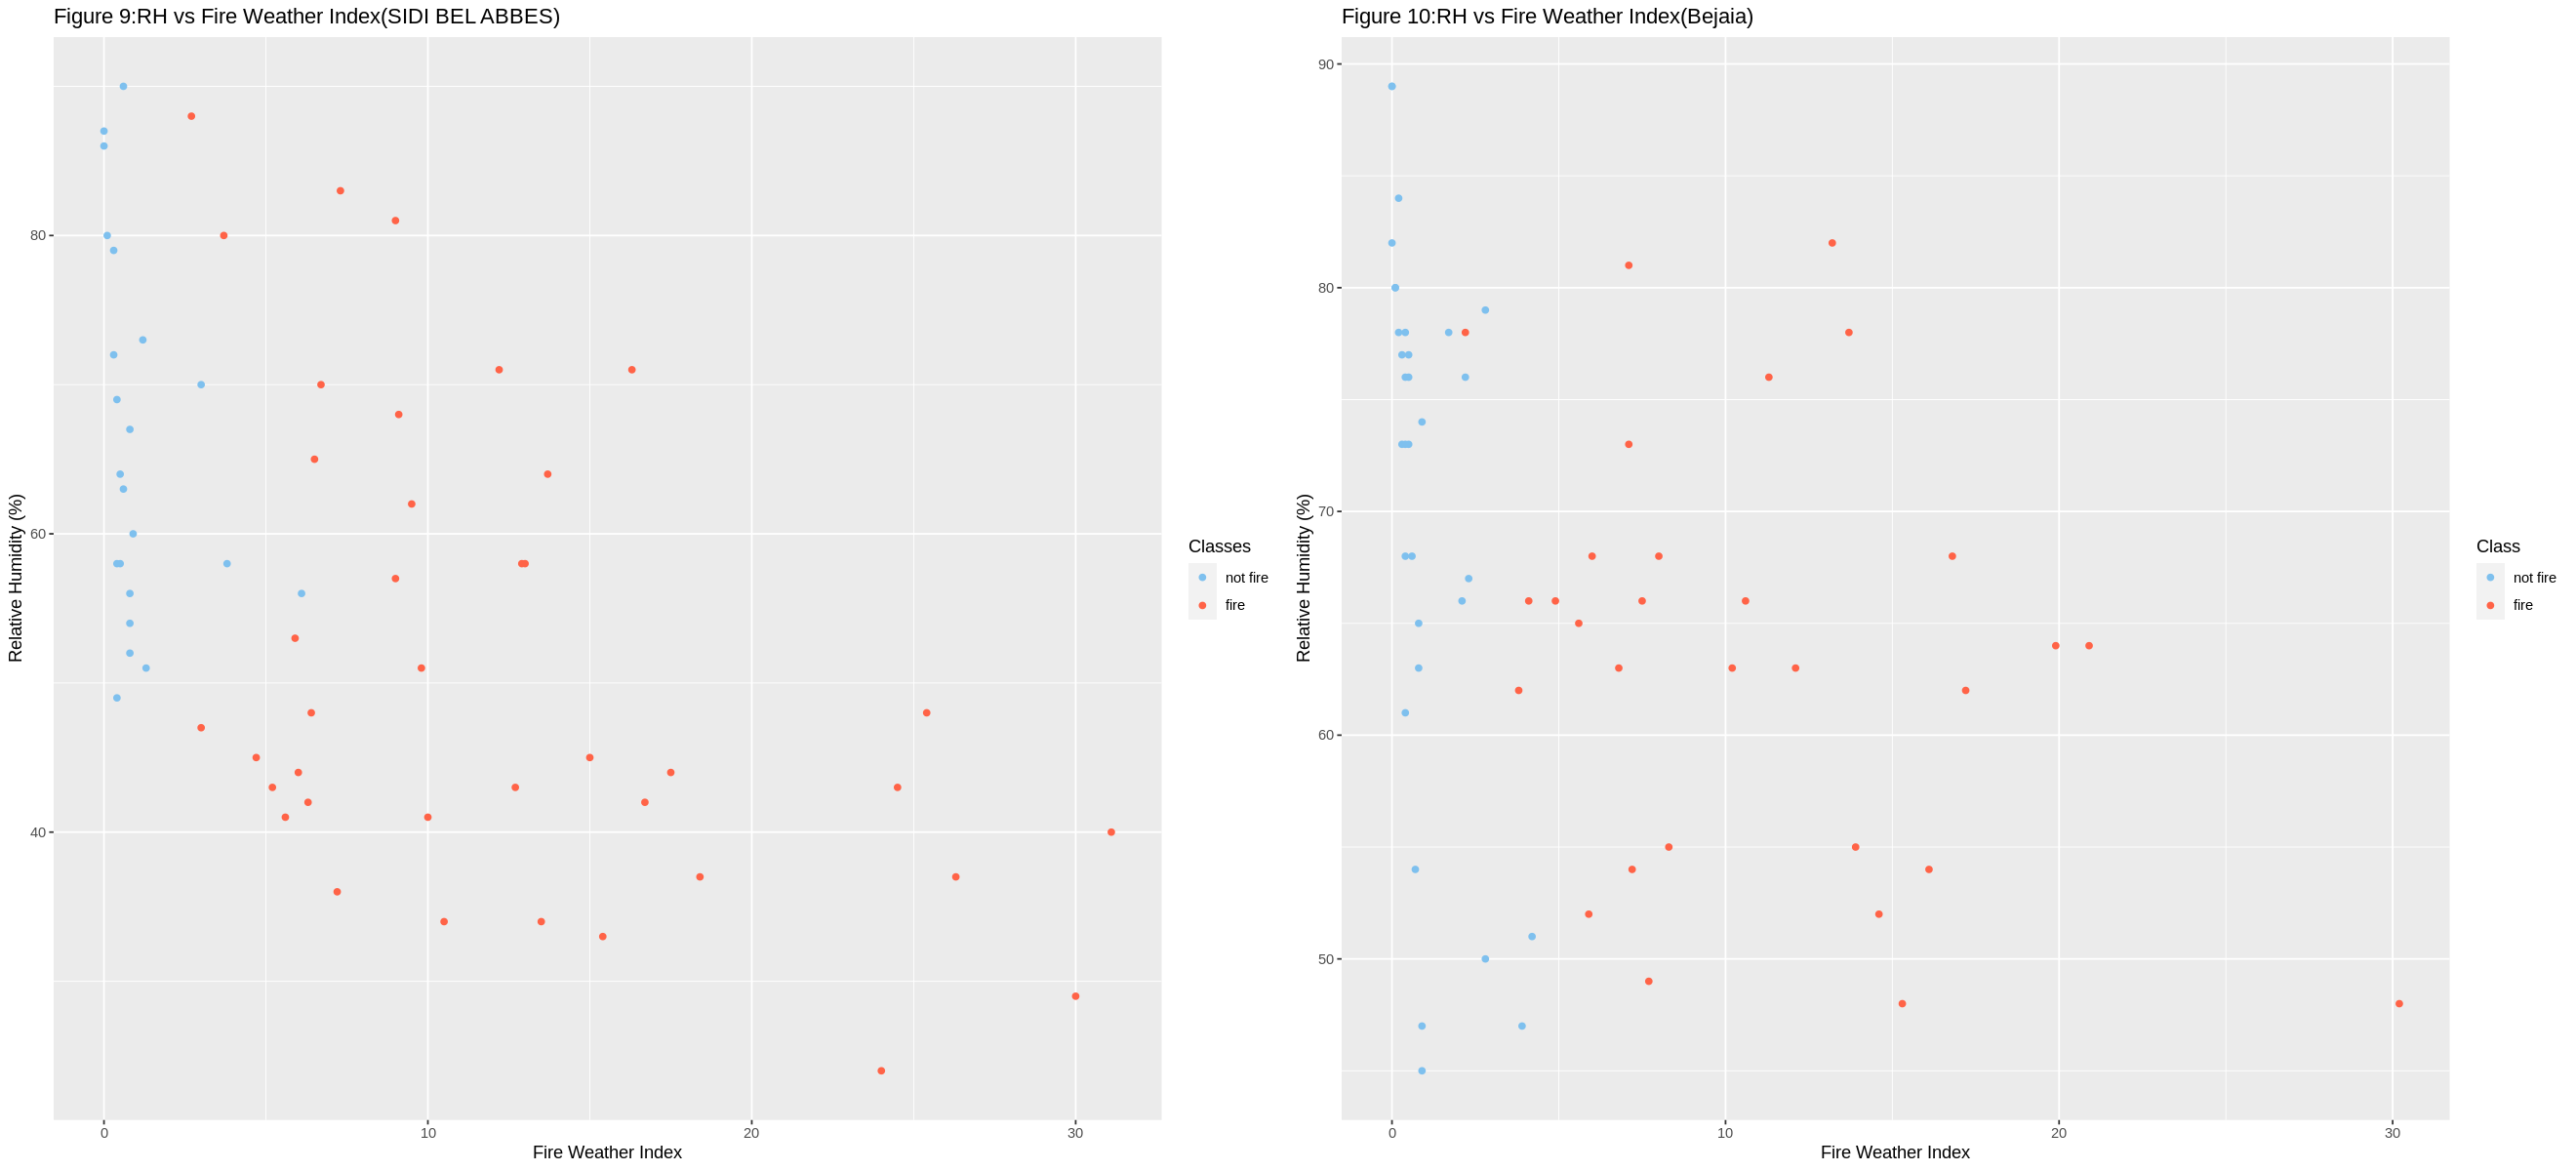

In [14]:
options(repr.plot.width = 22, repr.plot.height = 10)
FWI_plots <- plot_grid(Sidi_Bel_Abbes_RH_FWI, Bejaia_RH_FWI )
FWI_plots

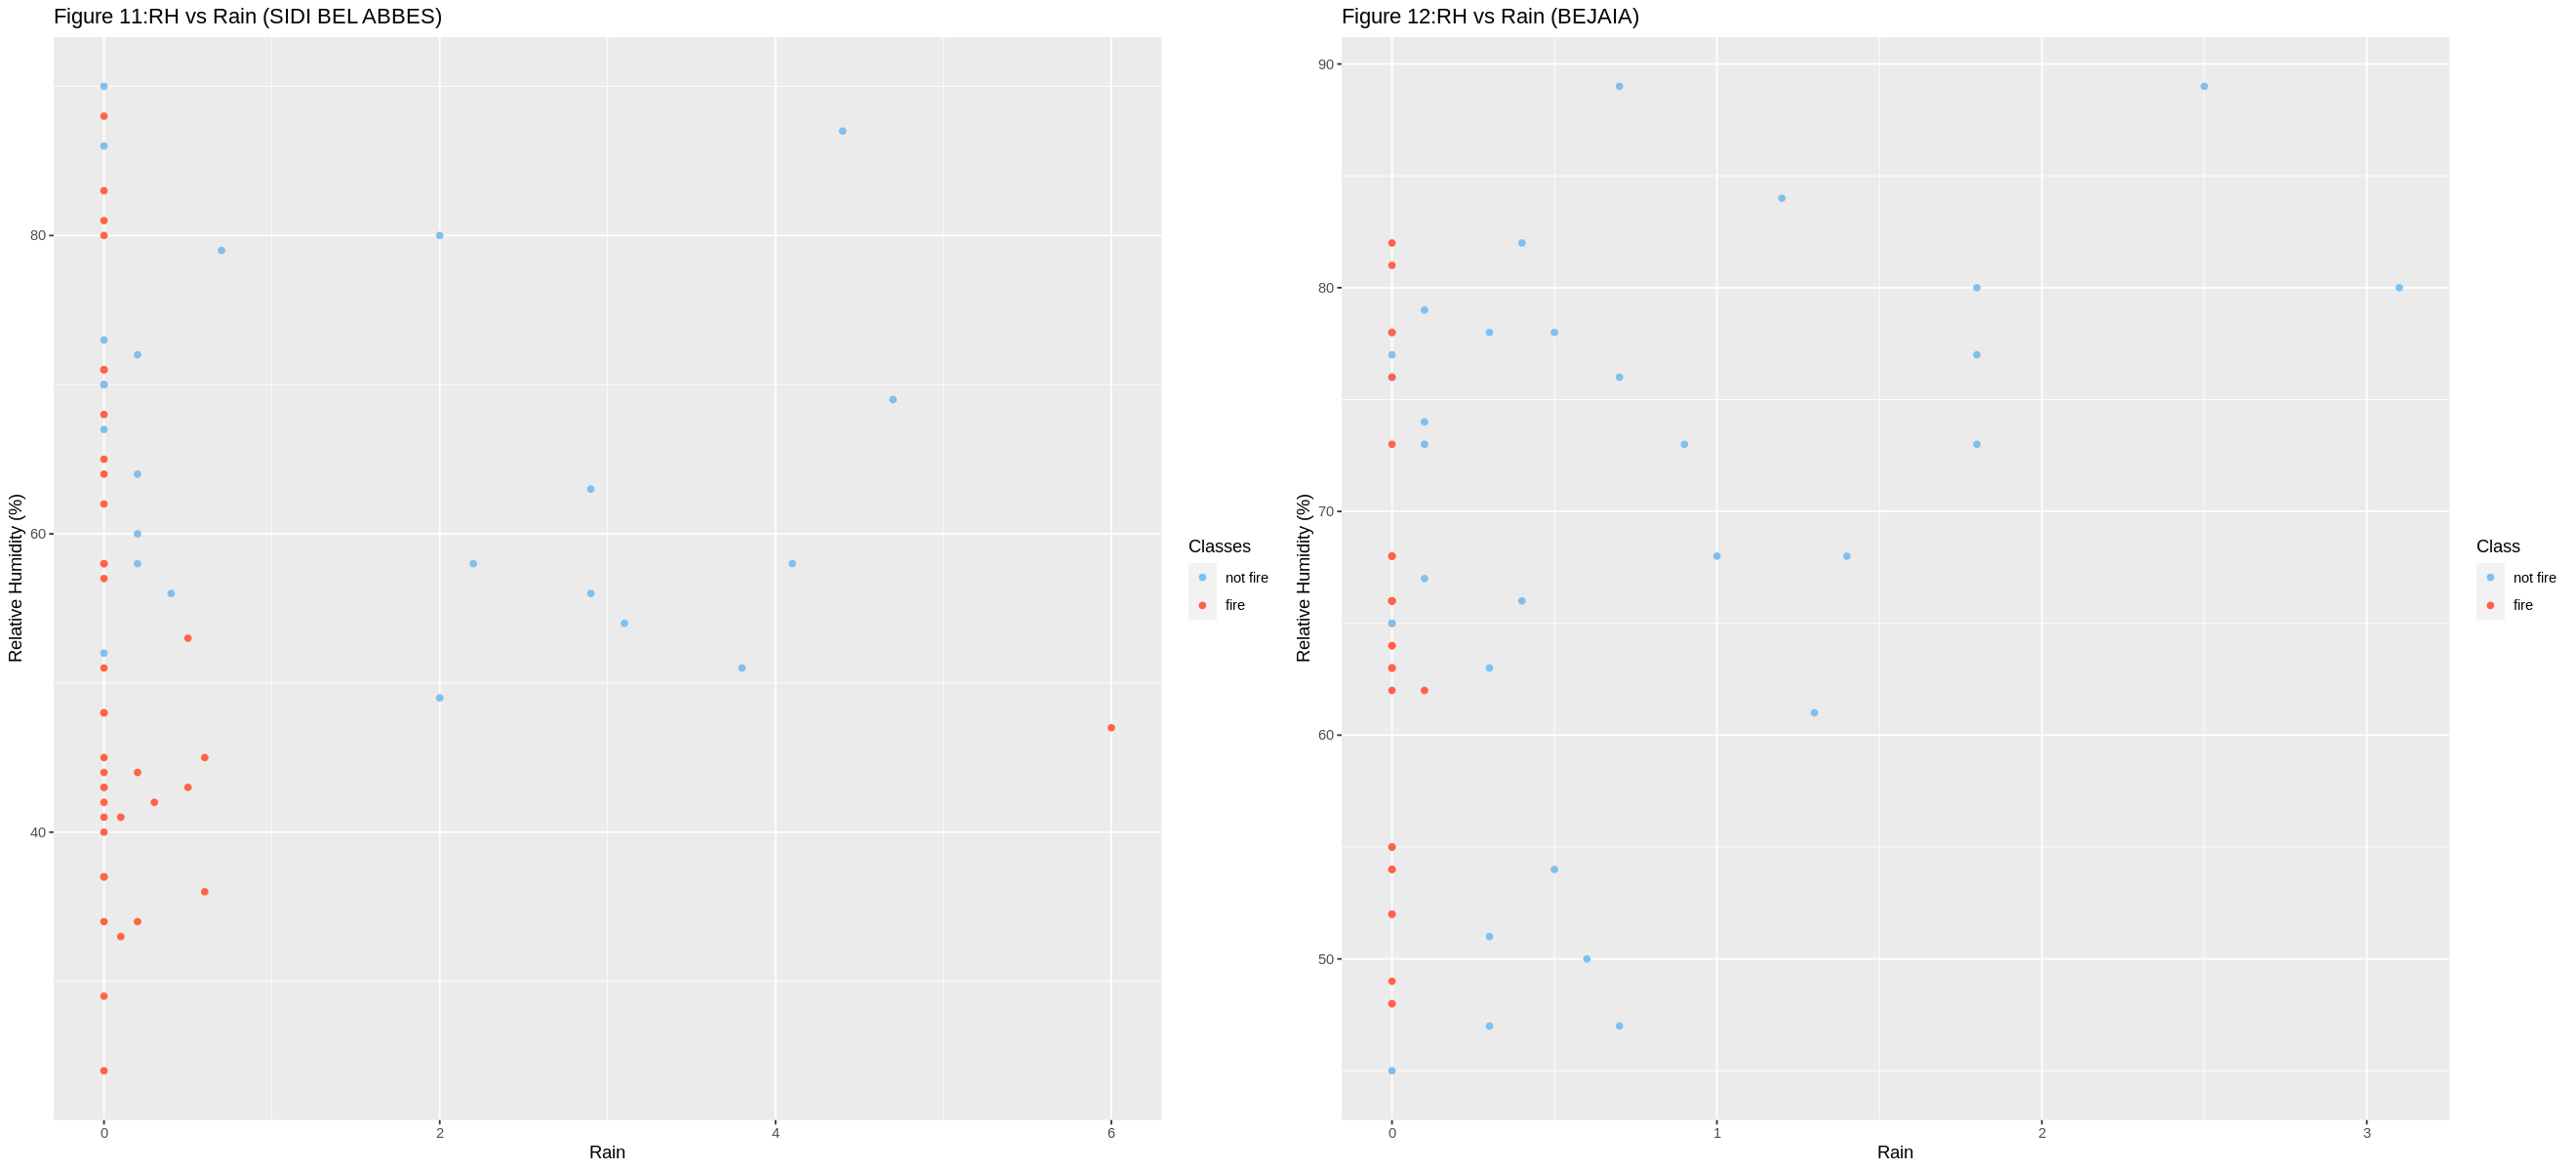

In [15]:
options(repr.plot.width = 22, repr.plot.height = 10)
RAIN_plots <- plot_grid(Sidi_Bel_Abbes_RH_Rain, Bejaia_RH_Rain)
RAIN_plots

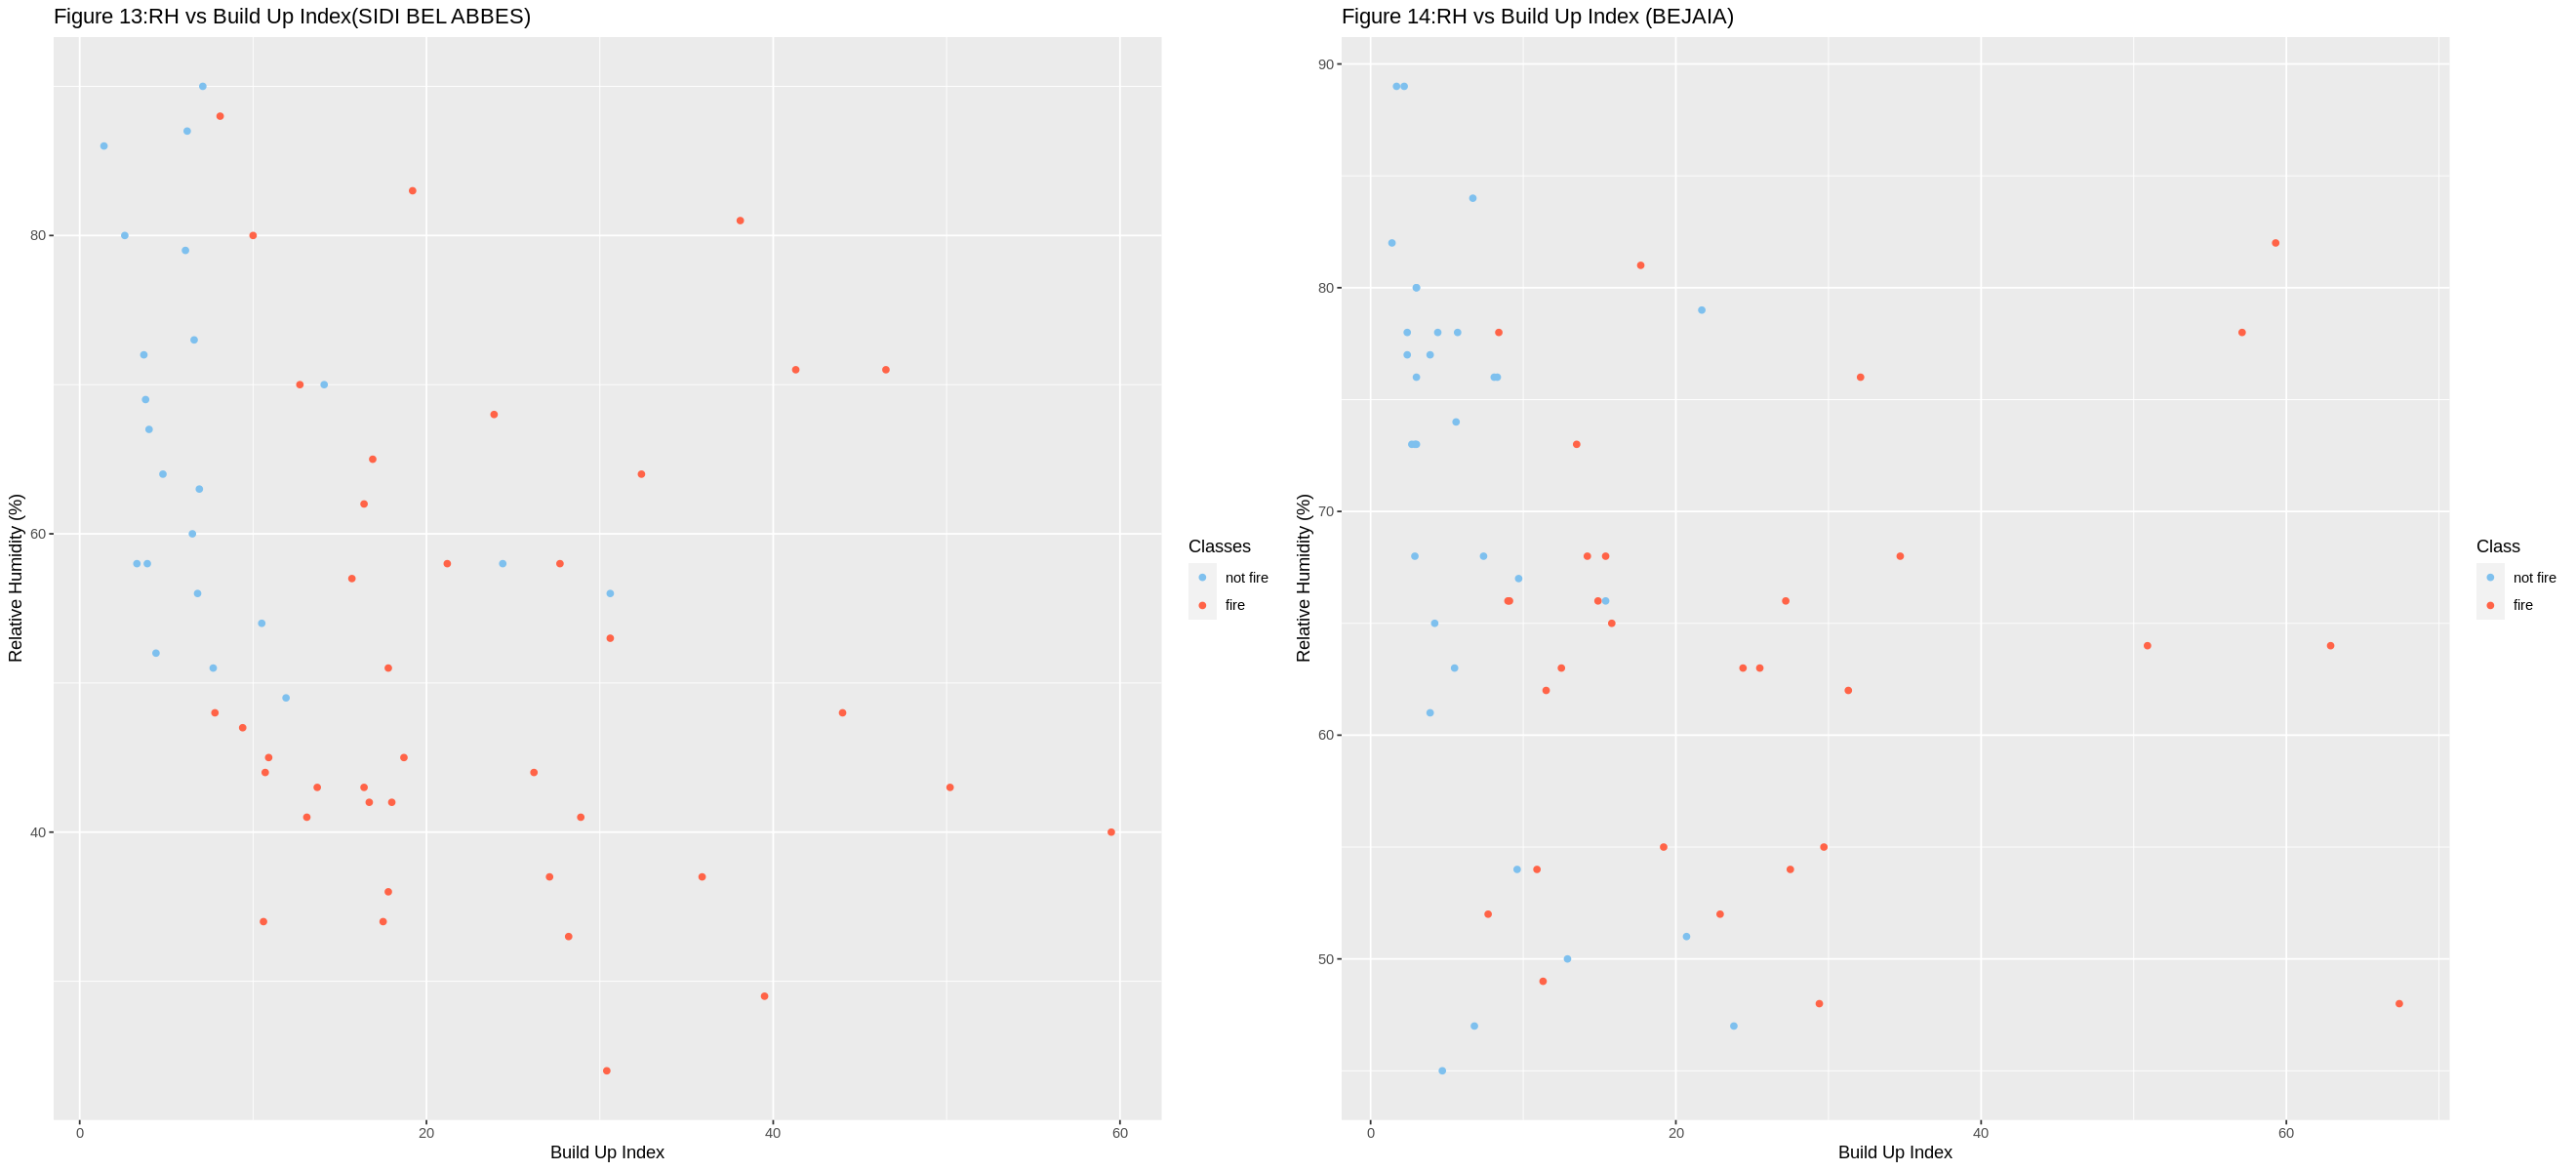

In [16]:
options(repr.plot.width = 22, repr.plot.height = 10)
BUI_plots <- plot_grid(Sidi_Bel_Abbes_RH_BUI,Bejaia_RH_BUI)
BUI_plots

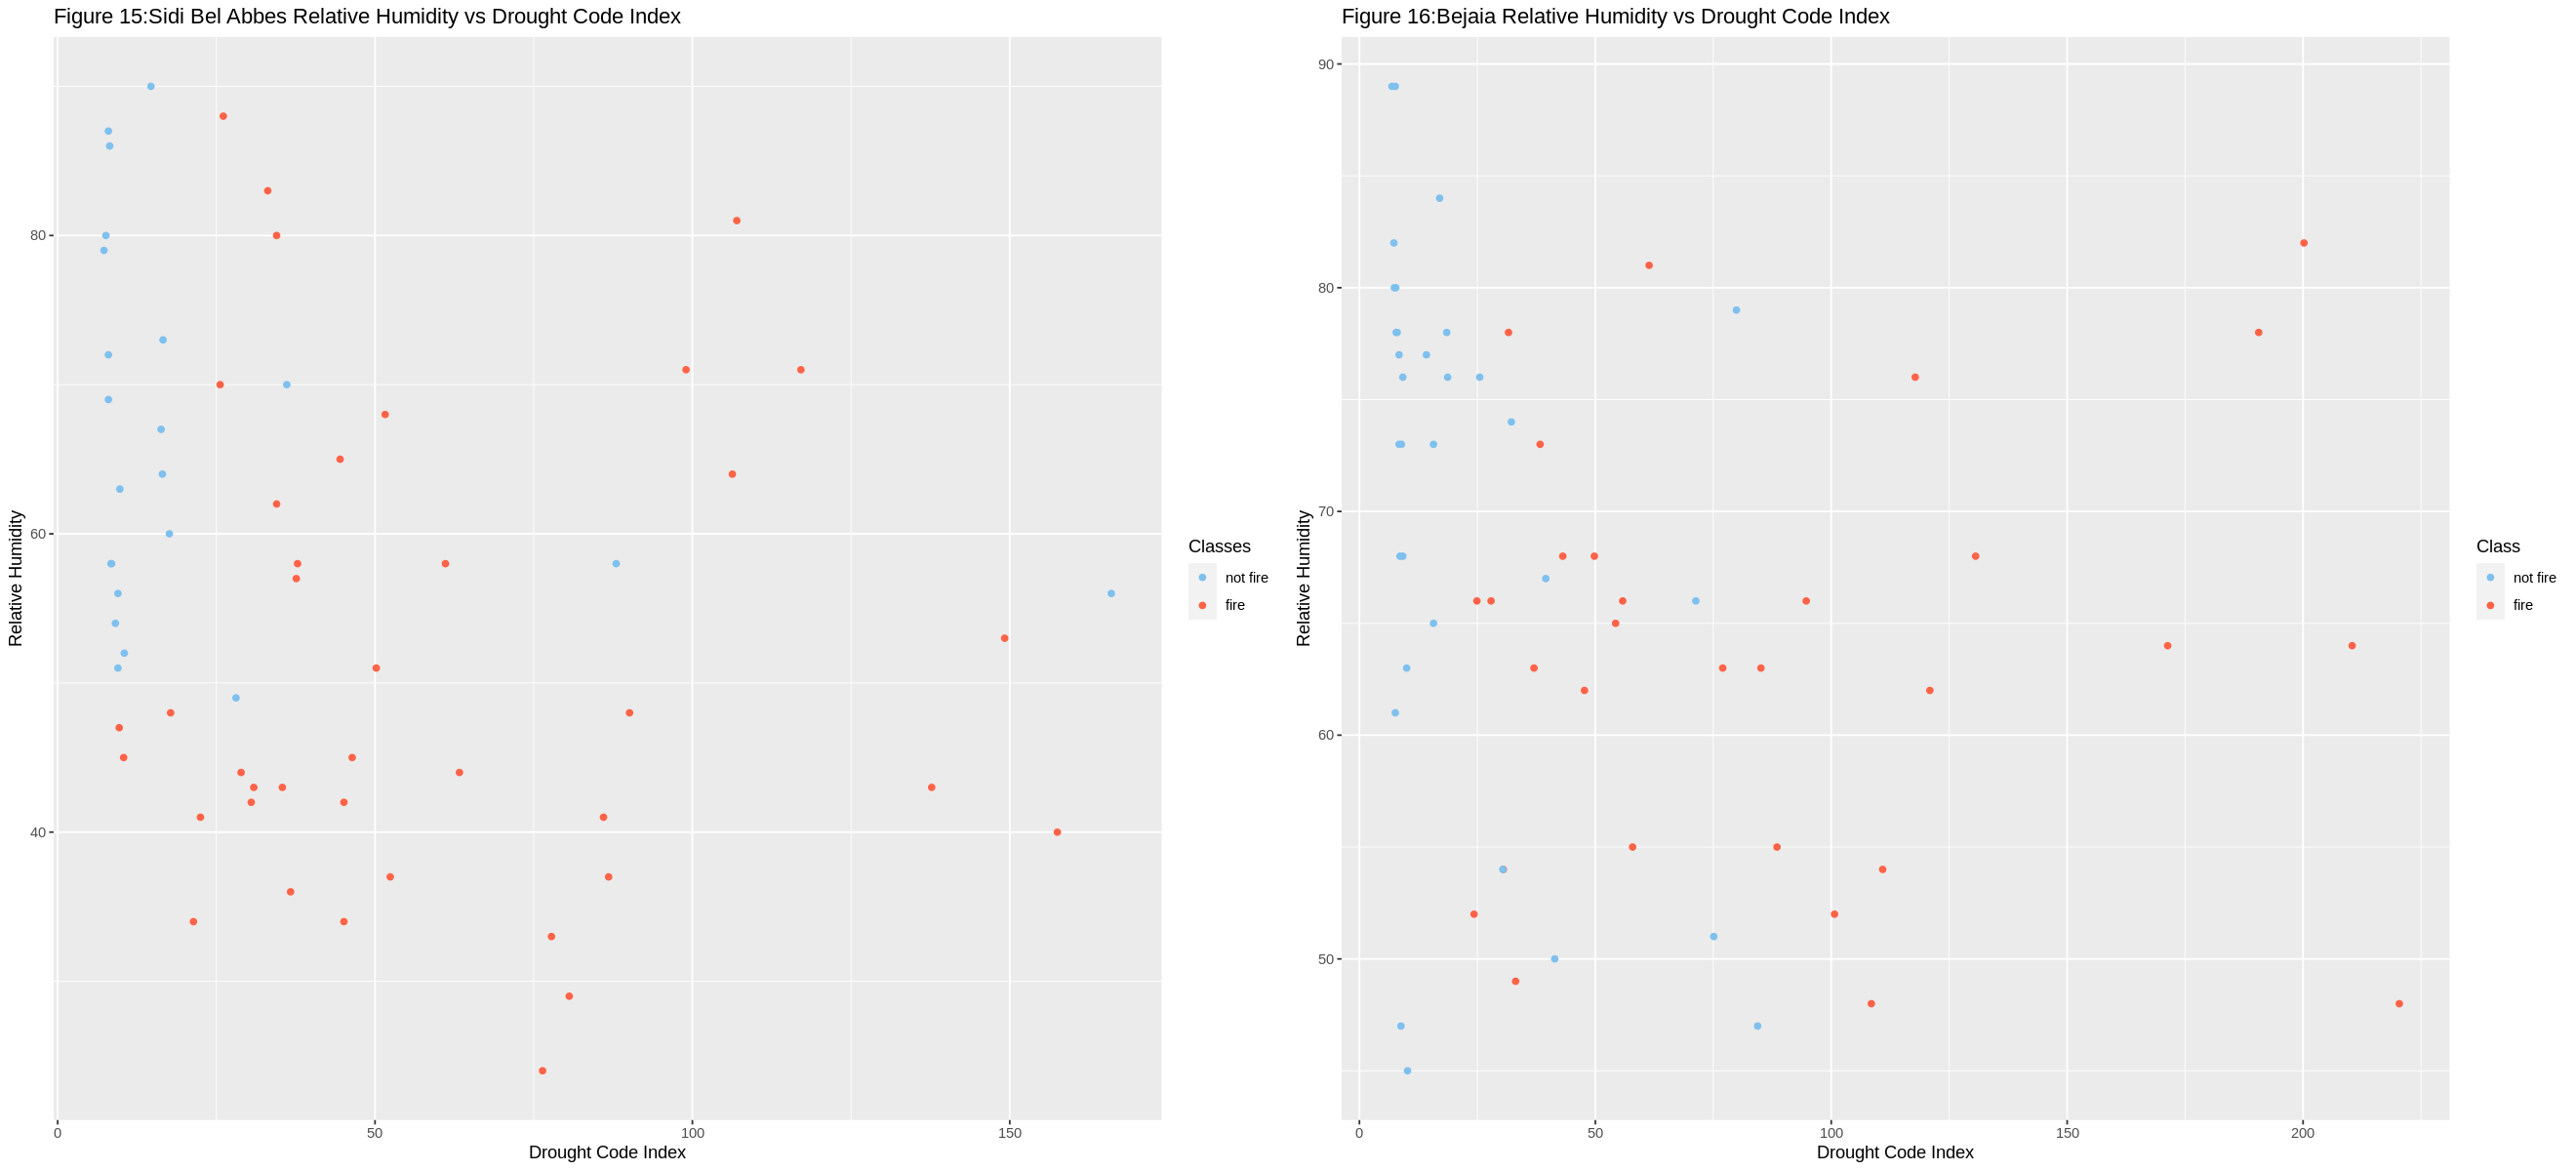

In [17]:
options(repr.plot.width = 22, repr.plot.height = 10)
DC_plots <- plot_grid(Sidi_Bel_Abbes_DC, Bejaia_DC)
DC_plots

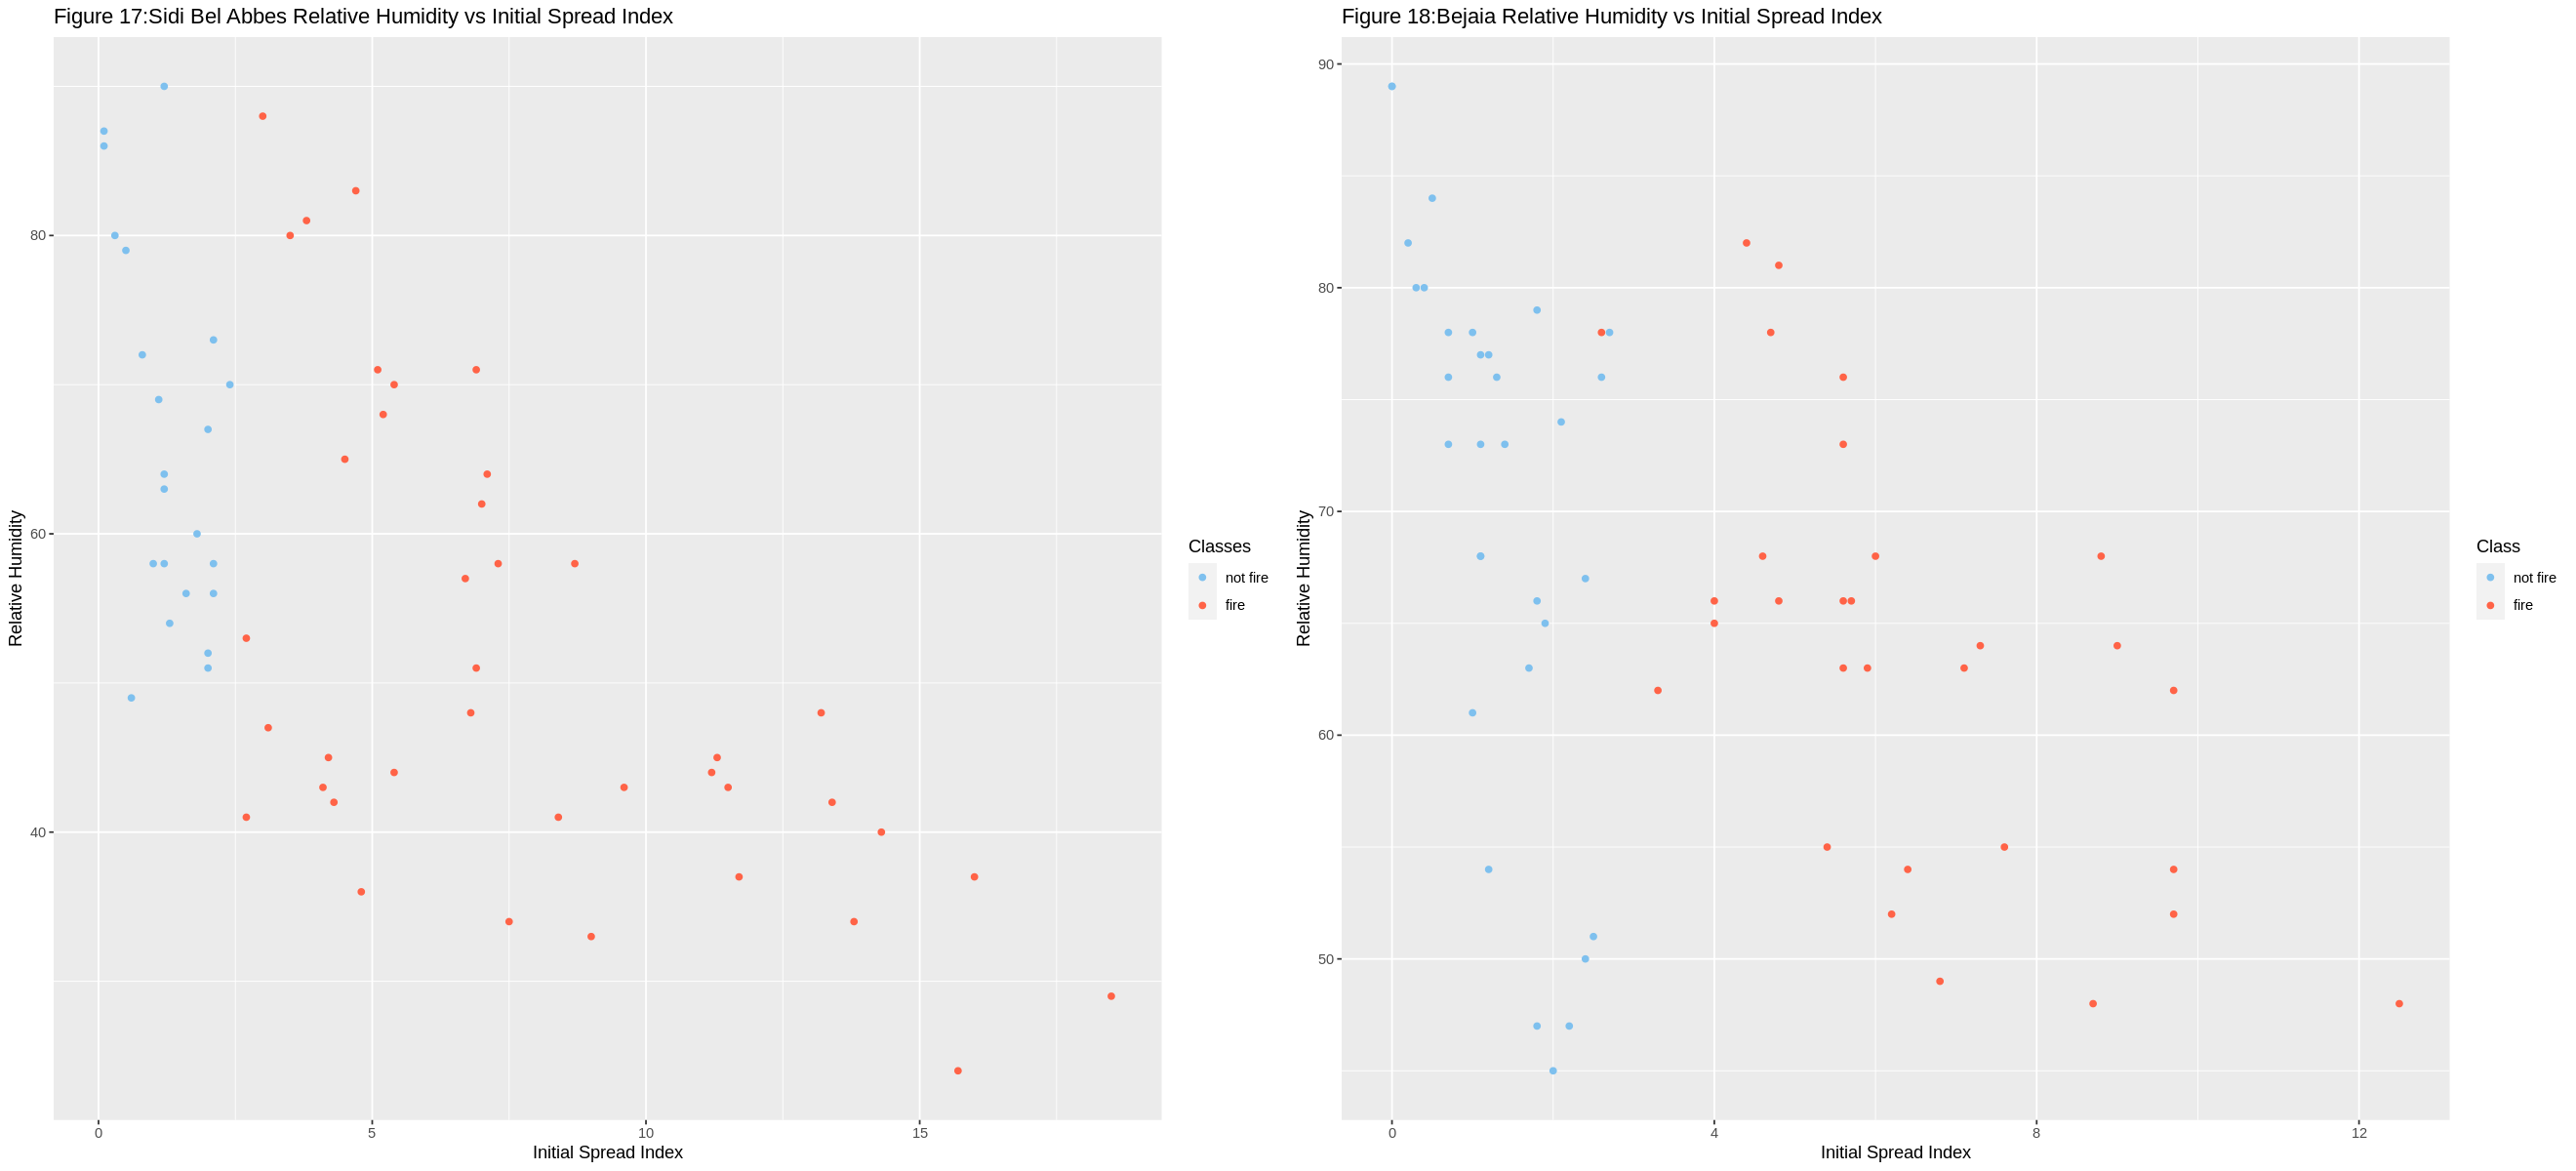

In [18]:
options(repr.plot.width = 22, repr.plot.height = 10)
ISI_plots <- plot_grid(Sidi_Bel_Abbes_ISI, Bejaia_ISI)
ISI_plots

This cell contains the constants needed for classification. These are the folded Bejaia and Sidi Bel Abbes datasets, K nearest neighbor tuning model, and K vals tibble. This cell also contains the seed to ensure reproducibility.

In [19]:
Bej_vfold_C <- vfold_cv(Bejaia_train, v =5 , strata =Class)
Sidi_vfold_C <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

set.seed(1)

This cell contains the scaled recipe for the fine fuel moisture code variable on the Bejaia dataset

In [20]:
Bej_FFMC_recipe_scaled <- recipe(Class ~ FFMC + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The cell below finds the optimal K value for fine fuel moisture code on the Bejaia dataset.

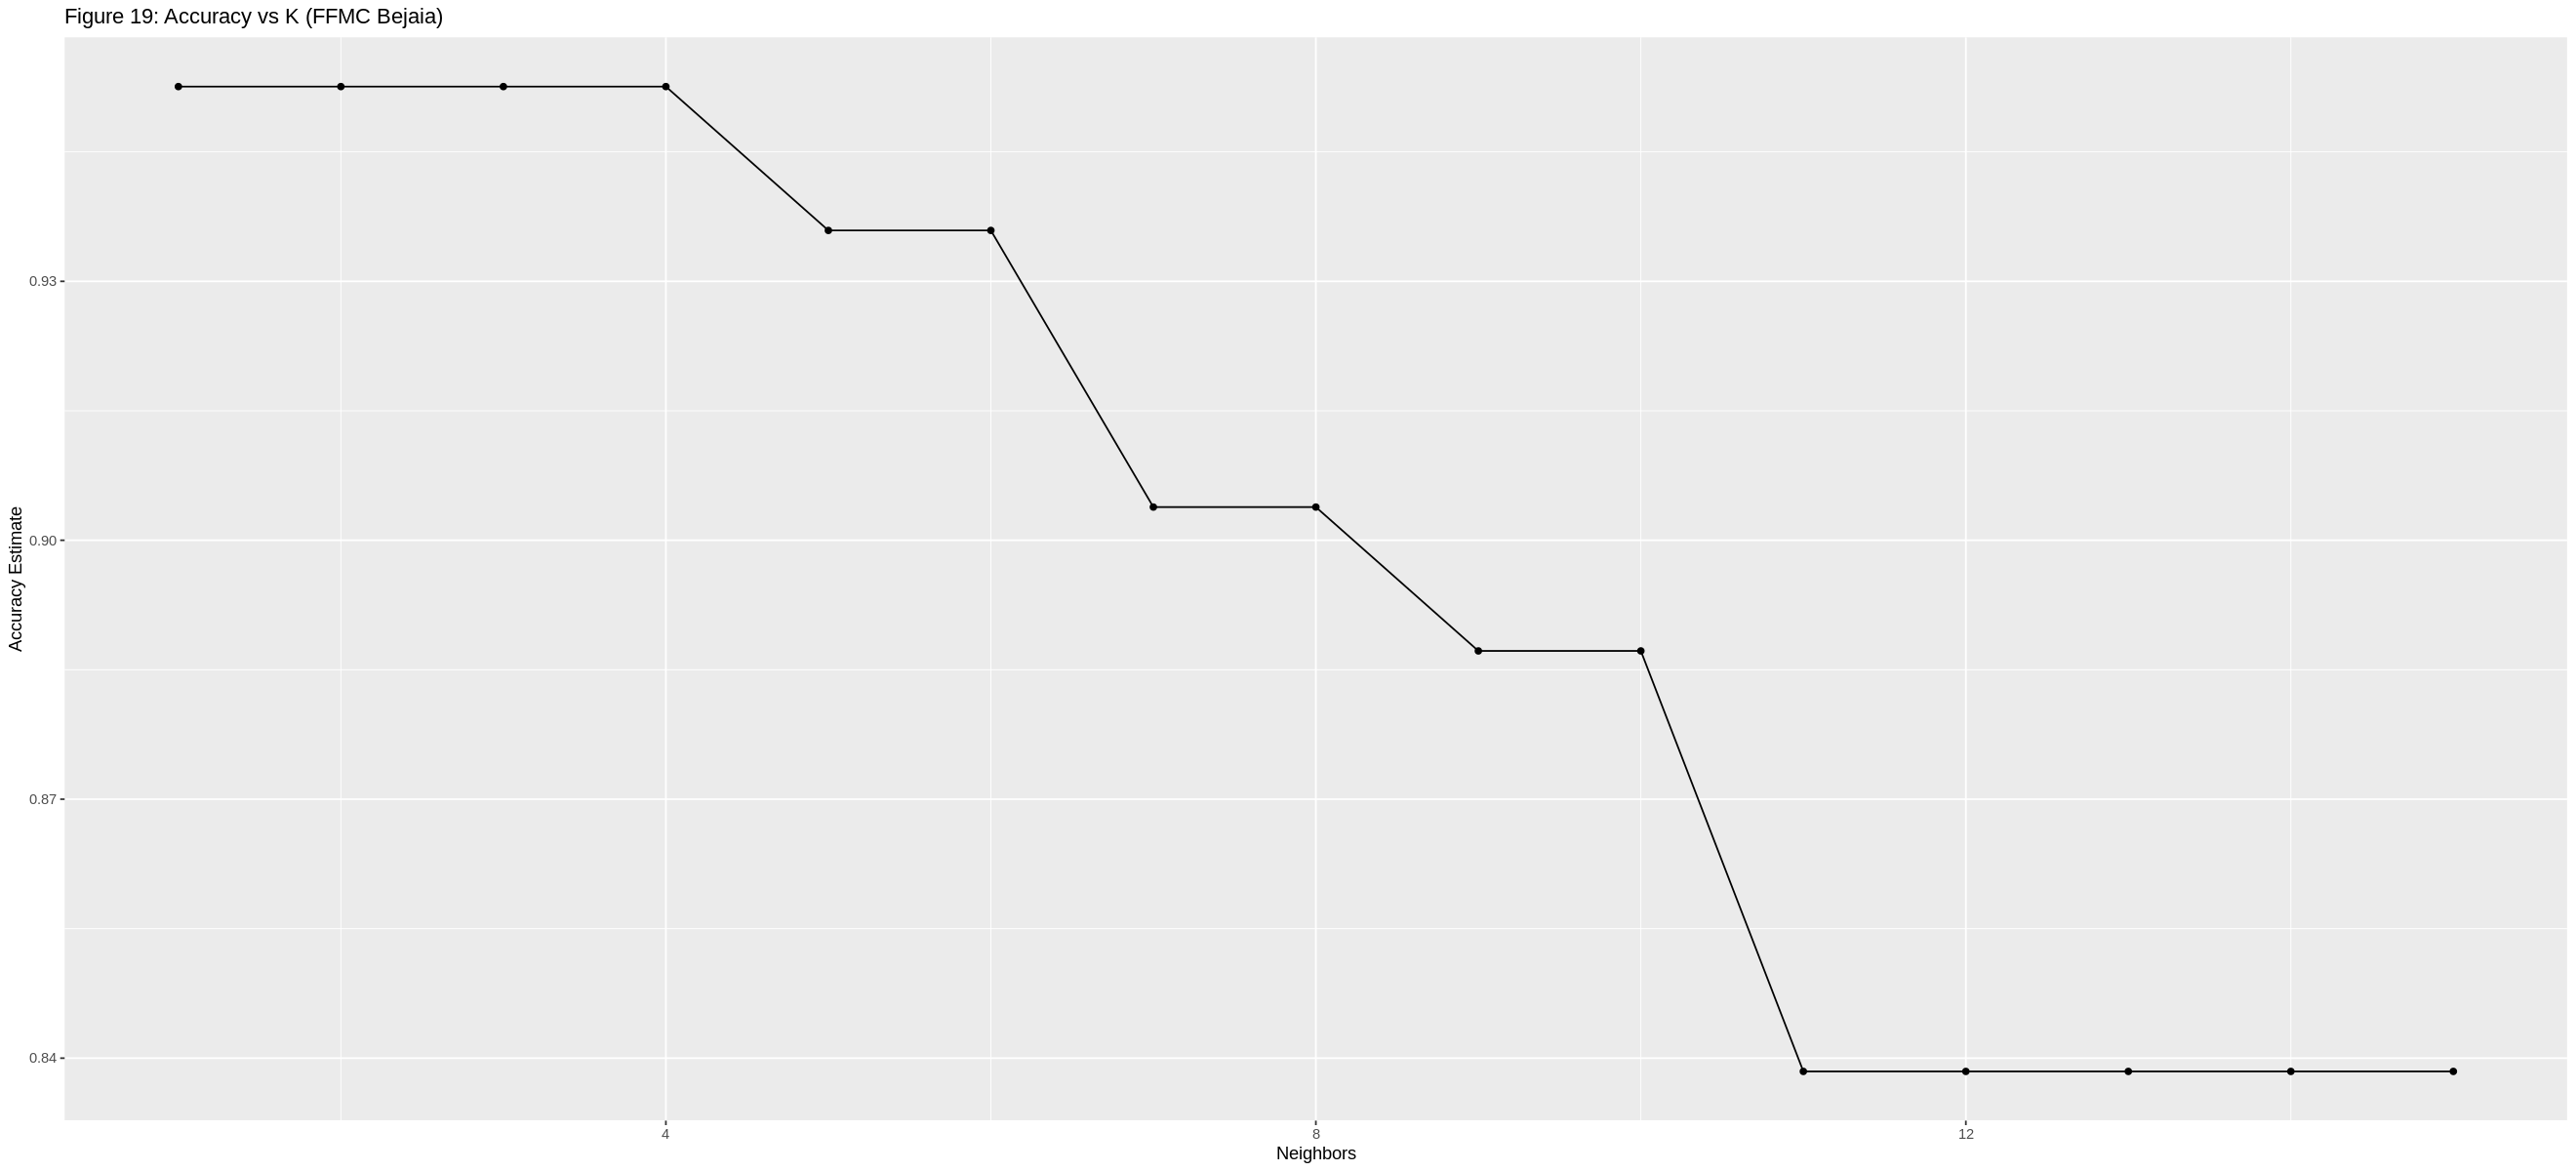

In [21]:
knn_results_tune_Bej_FFMC <- workflow() %>%
  add_recipe(Bej_FFMC_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_bej_FFMC <- knn_results_tune_Bej_FFMC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Bej_FFMC <- ggplot(accuracies_bej_FFMC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title="Figure 19: Accuracy vs K (FFMC Bejaia)")+
  scale_x_continuous()
accuracy_vs_k_Bej_FFMC

From the above graph K values one to four are the predicted optimal values to obtain the highiest accuracy. We chose three because we did not want new points to be determined soley by the closest neighbor.
The code below takes k=3 and retrains our model. This newly trained model is then used to predict the test data and the accuracy of the model is printed below.

In [22]:
Bej_knn_spec_FFMC <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_FFMC_Fit_C <- workflow() %>%
    add_recipe(Bej_FFMC_recipe_scaled) %>%
    add_model(Bej_knn_spec_FFMC) %>%
    fit(data=Bejaia_train)

Bej_FFMC_prediction <- predict(Bej_FFMC_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_FFMC_prediction_accuracy <- Bej_FFMC_prediction %>%
    metrics(truth=Class, estimate= .pred_class)  %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
Bej_FFMC_prediction_accuracy

[1] 0.9166667

On the test data our model had an accuracy of 92%. This accuracy is almost identical to the predicted accuracy of approximately 94%. There is some variance to be expected in the accuracy so the difference is to be expected.

The cell below contains the recipe for FFMC for the Sidi Bel Abbes data set.

In [23]:
Sidi_FFMC_recipe_scaled <- recipe(Classes ~ FFMC + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Cell below finds the optimal K value for FFMC for the Sidi Bel Abbes Data set

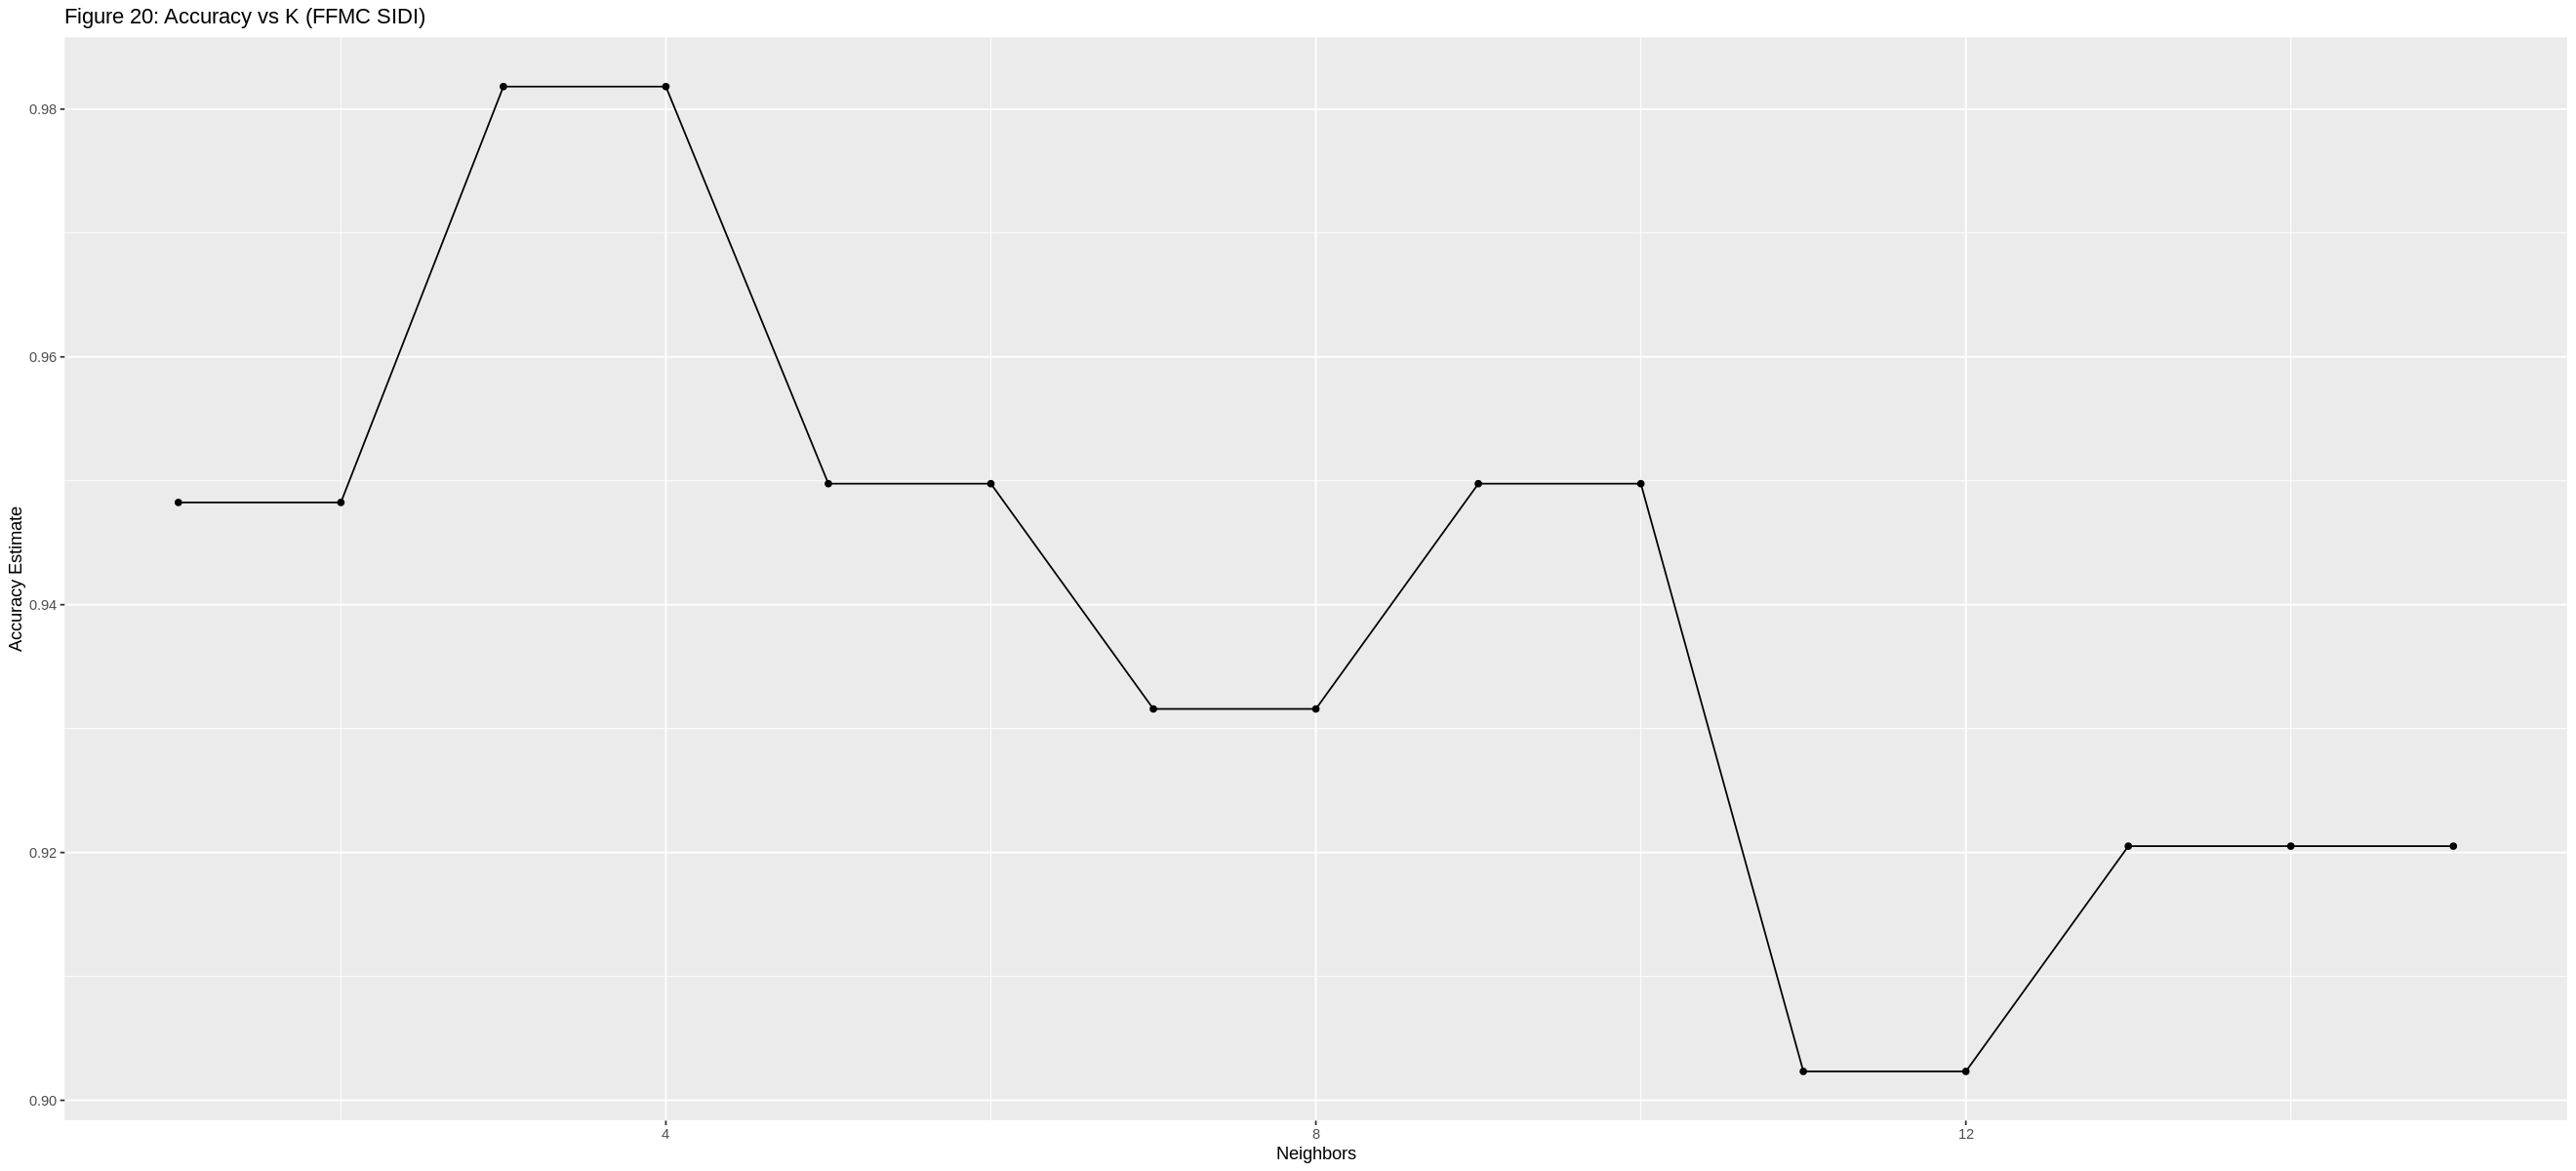

In [24]:
set.seed(1)
knn_results_tune_Sidi_FFMC <- workflow() %>%
  add_recipe(Sidi_FFMC_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Sidi_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_Sidi_FFMC <- knn_results_tune_Sidi_FFMC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Sidi_FFMC <- ggplot(accuracies_Sidi_FFMC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title="Figure 20: Accuracy vs K (FFMC SIDI)")+
  scale_x_continuous()

accuracy_vs_k_Sidi_FFMC

This graph tells use that the optimal predicted K value is either 3 or 4 with an accuracy of 98%. We decided to choose 3.

Using the optimal K value calculate the accuracy of the classification model for FFMC on the Sidi Bel Abbes test data

In [25]:
set.seed(1)
Sidi_knn_spec_FFMC <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_FFMC_Fit_C <- workflow() %>%
    add_recipe(Sidi_FFMC_recipe_scaled) %>%
    add_model(Sidi_knn_spec_FFMC) %>%
    fit(data=Sidi_Bel_Abbes_train)

Sidi_FFMC_prediction <- predict(Sidi_FFMC_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_FFMC_prediction_accuracy <- Sidi_FFMC_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)  %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
Sidi_FFMC_prediction_accuracy

[1] 0.95

The actual accuracy is 95%. A bit lower than the projected accuracy of 98% but expected as the test data is different compared to the training data.

The next cell contains the recipe rain on the Bejaia dataset

In [26]:
Bej_Rain_recipe_scaled <- recipe(Class ~ Rain + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The next cell determines the optimal K value for rain on the Bejaia dataset

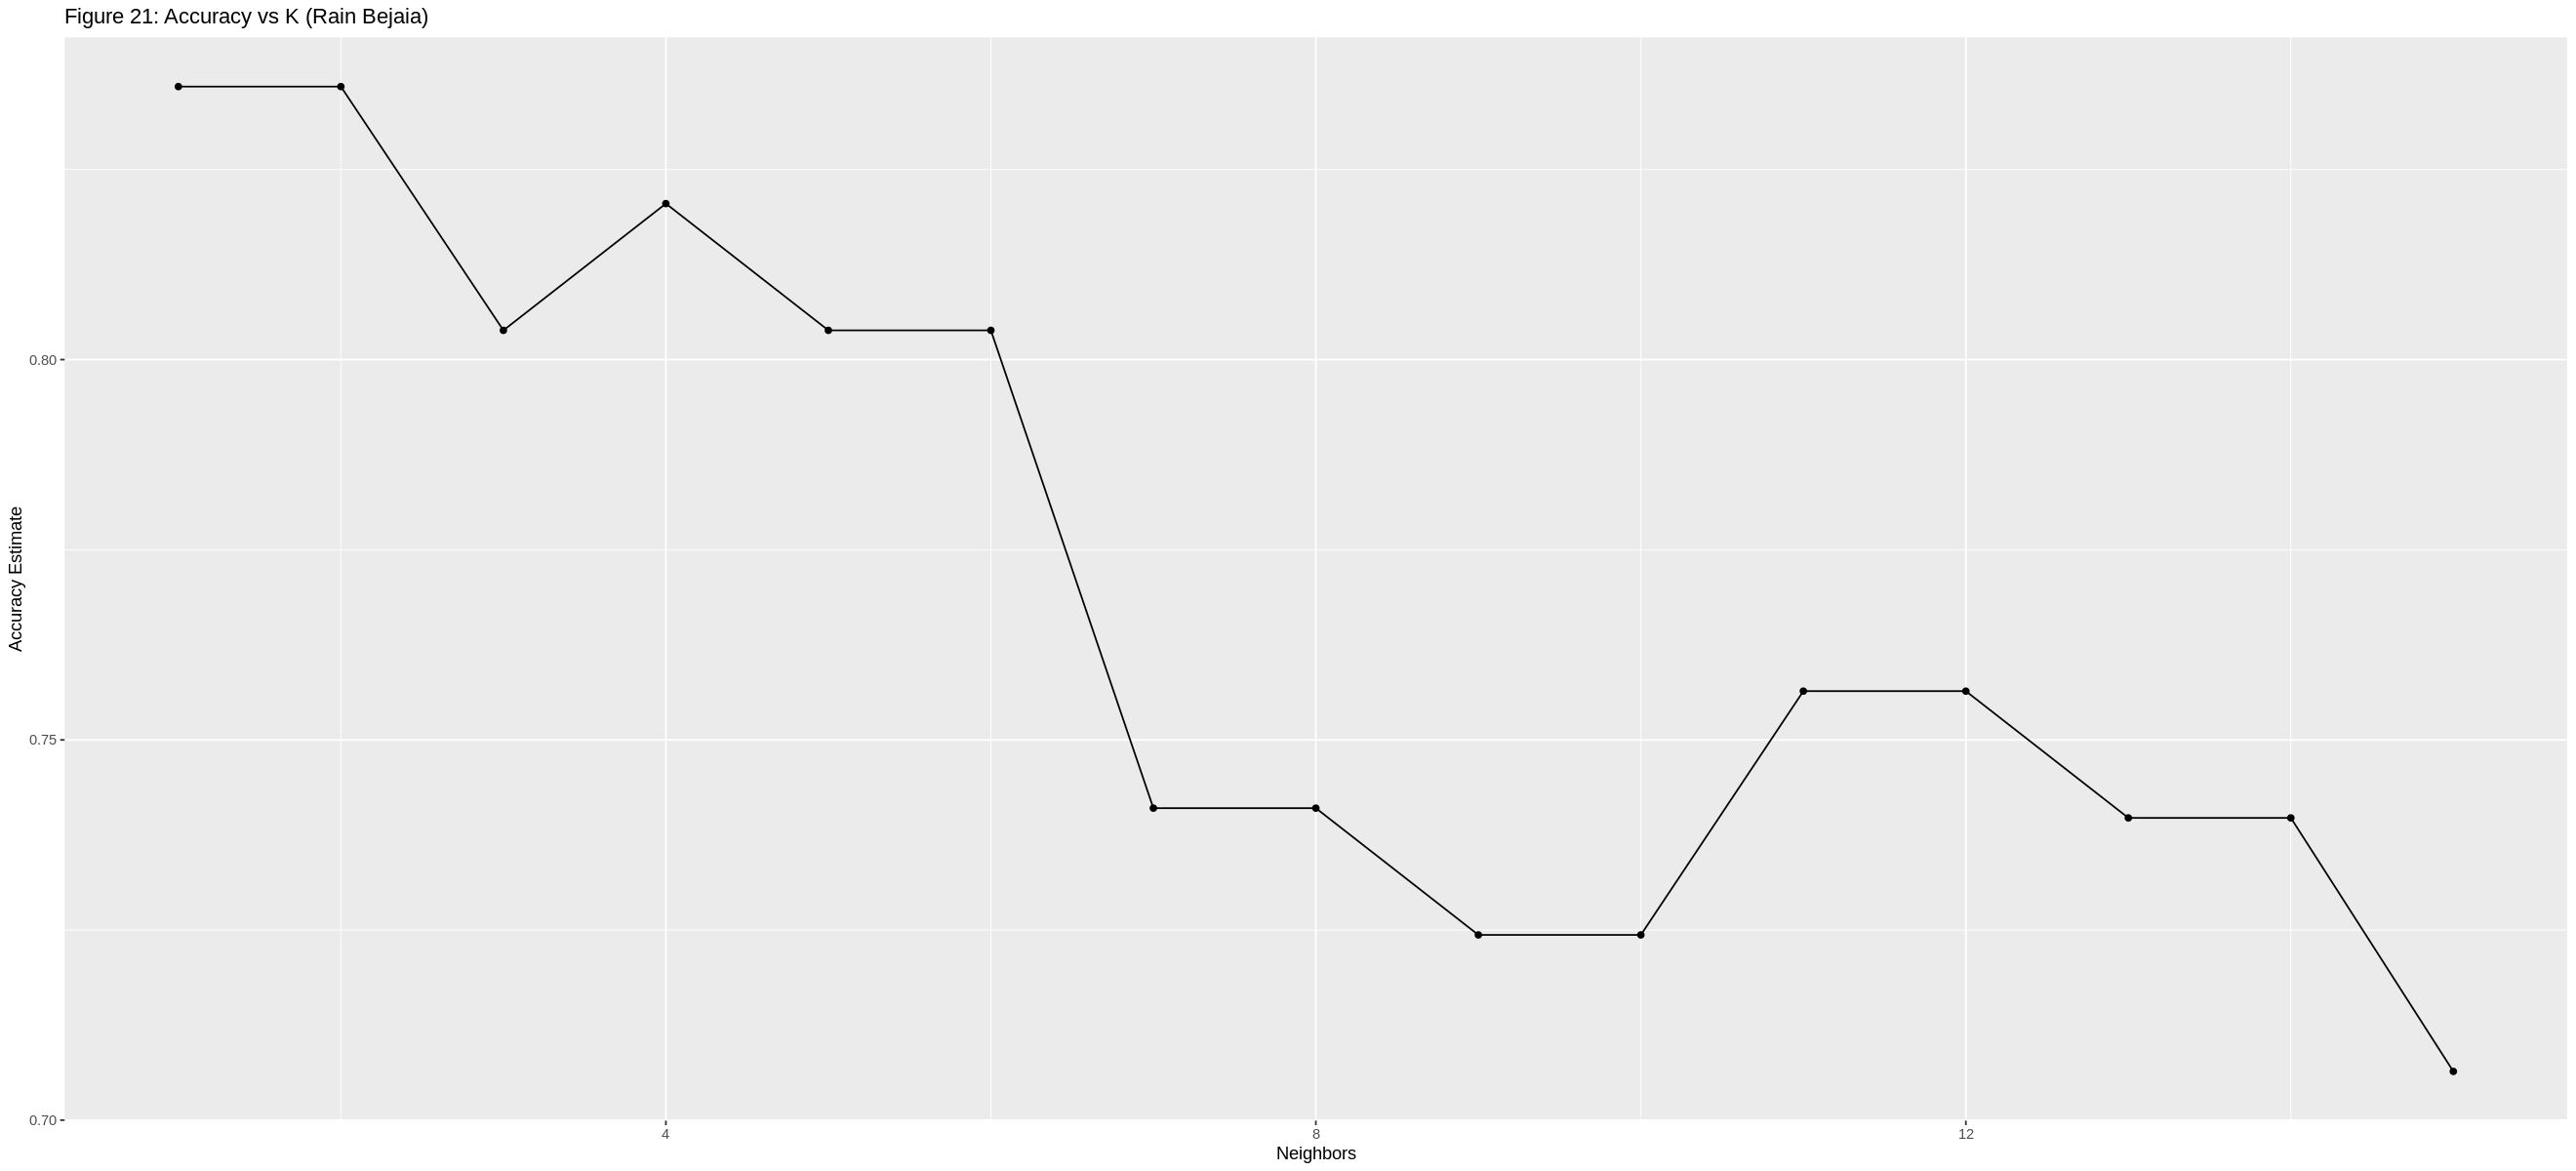

In [28]:
knn_results_tune_Bej_rain <- workflow() %>%
  add_recipe(Bej_Rain_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_bej_Rain <- knn_results_tune_Bej_rain %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Bej_Rain <- ggplot(accuracies_bej_Rain, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title="Figure 21: Accuracy vs K (Rain Bejaia)")+
  scale_x_continuous()

accuracy_vs_k_Bej_Rain

From the graph above we can see that k values 1 or 2 would be best with an accuracy of around 83%. We decided on k=1 because we have to use an odd number to decide to class.

The following cell determines the accuracy of the model on the Bejaia dataset using the rain variable.

In [29]:
Bej_knn_spec_rain <- nearest_neighbor(weight_func="rectangular", neighbors=1) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_Rain_Fit <- workflow() %>%
    add_recipe(Bej_Rain_recipe_scaled) %>%
    add_model(Bej_knn_spec_rain) %>%
    fit(data=Bejaia_train)

Bej_Rain_prediction <- predict(Bej_Rain_Fit, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_Rain_prediction_accuracy <- Bej_Rain_prediction %>%
    metrics(truth=Class, estimate= .pred_class)  %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
Bej_Rain_prediction_accuracy 

[1] 0.8166667

The accuracy is 82% which is close to the predicted 83% average.

The next cell contains the scaled recipe for rain on the Sidi Bel Abbes data set

In [30]:
SBA_Rain_recipe_scaled <- recipe(Classes ~ Rain + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The next cell plots accuracy over K to visualize the best K value.

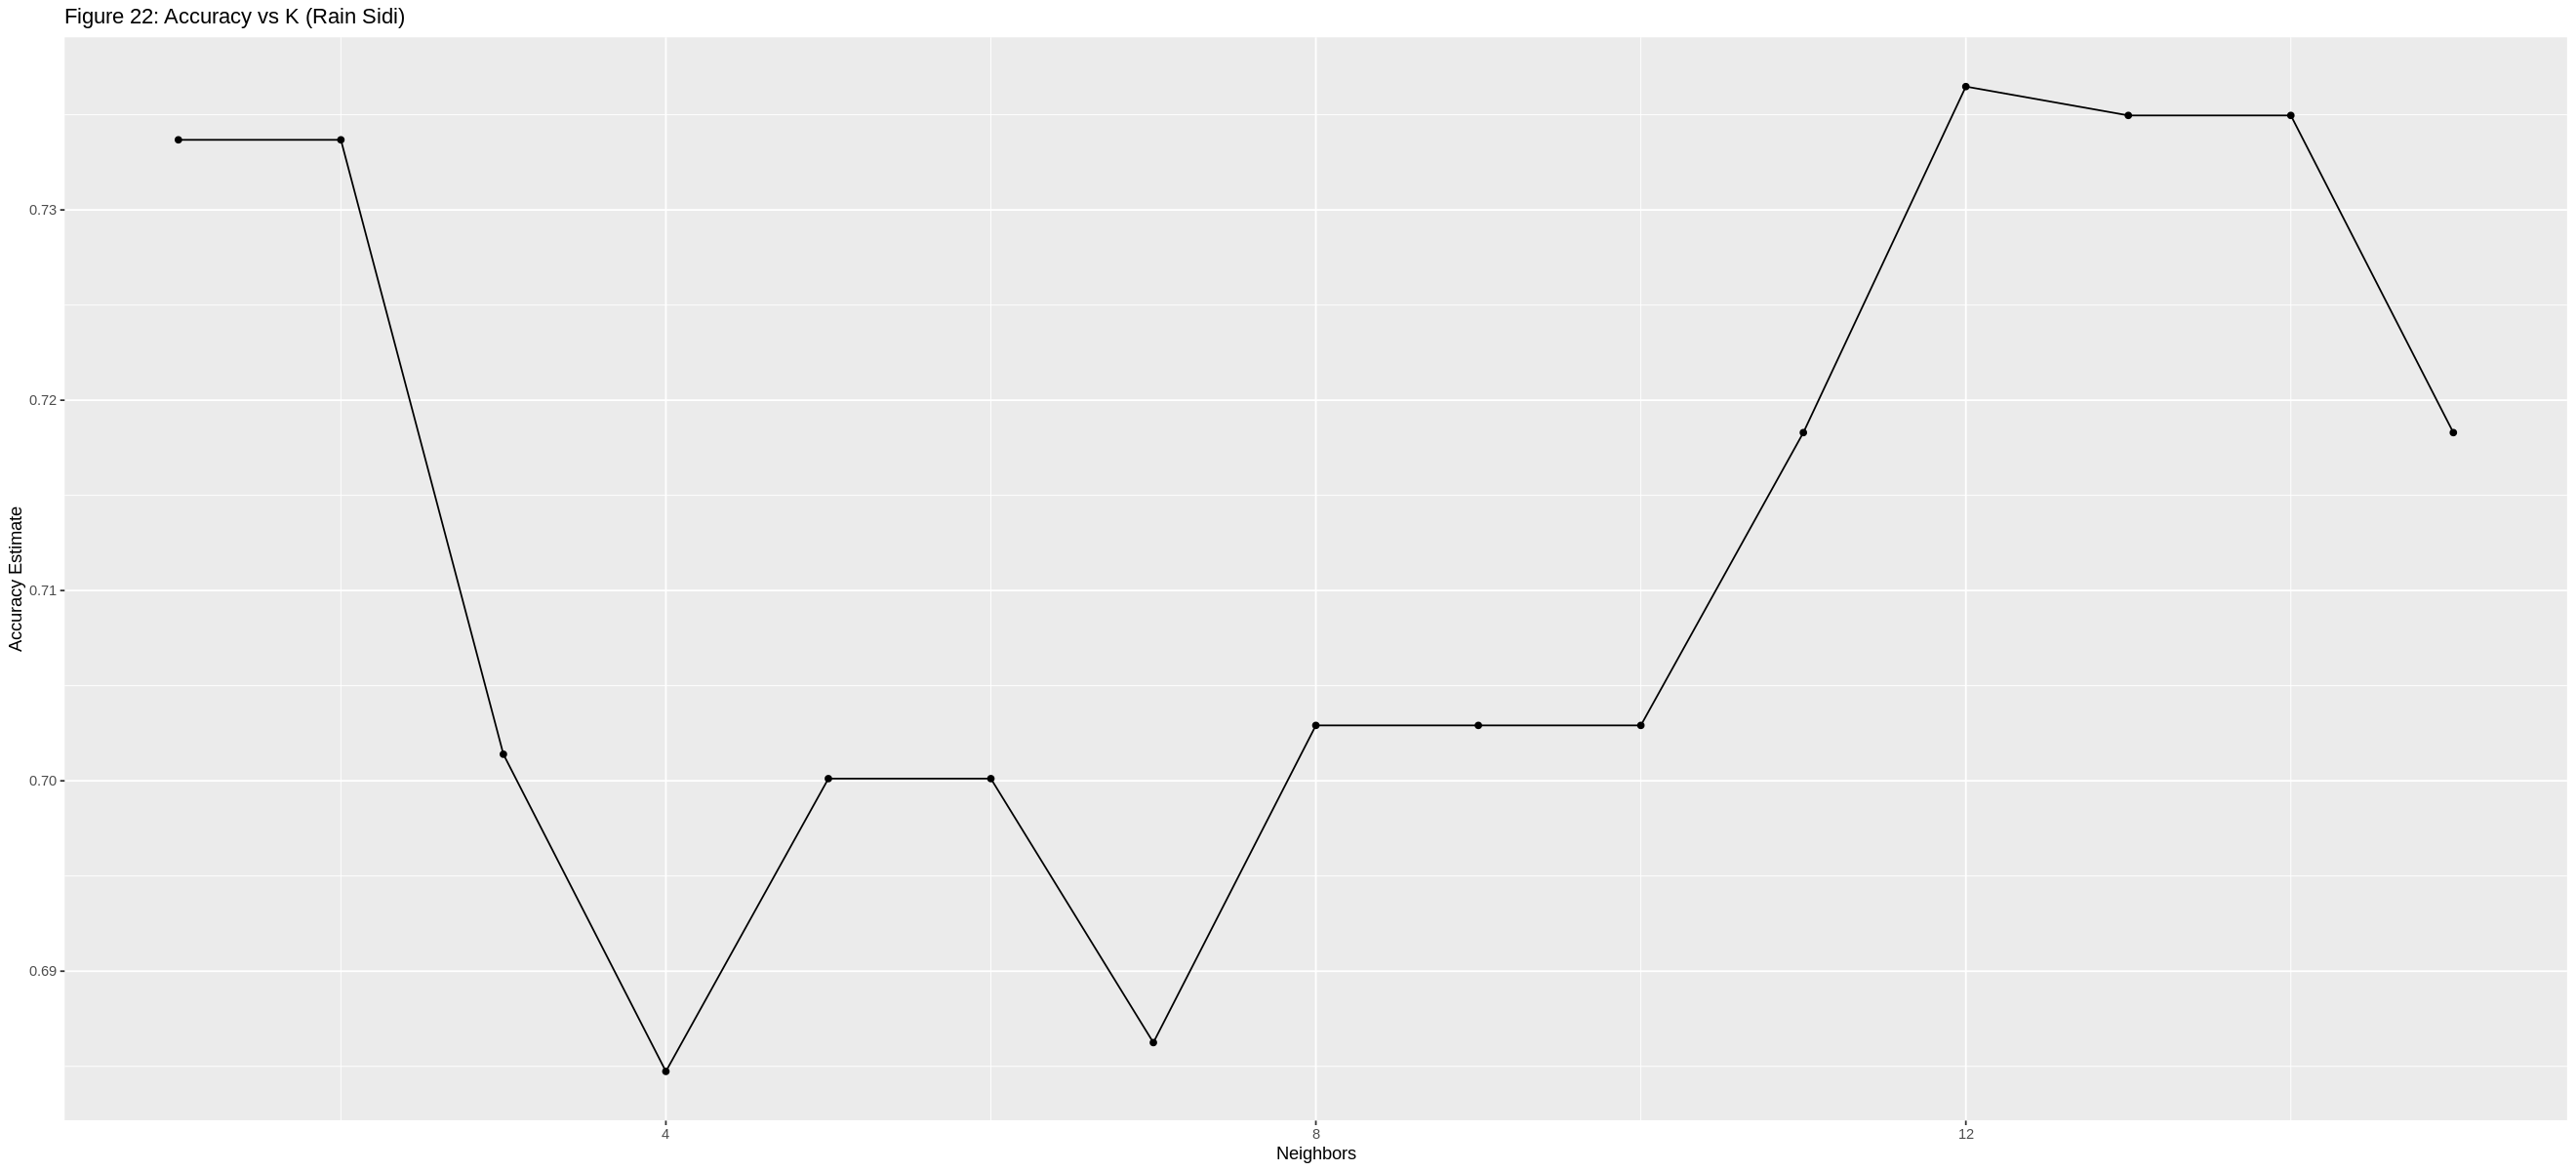

In [31]:
knn_results_tune_SBA_Rain <- workflow() %>%
  add_recipe(SBA_Rain_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Sidi_vfold_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_SBA_Rain <- knn_results_tune_SBA_Rain %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_SBA_Rain, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 22: Accuracy vs K (Rain Sidi)")+
  scale_x_continuous()
accuracy_vs_k

The graph tells us that the optimal k value is 12. However we don't want an even value so the next best option is k=13 with a predicted accuracy of 73.5%

In [32]:
SBA_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=13) %>%
    set_engine("kknn") %>%
    set_mode("classification")

SBA_Rain_Fit_C <- workflow() %>%
    add_recipe(SBA_Rain_recipe_scaled) %>%
    add_model(SBA_knn_spec_C) %>%
    fit(data=Sidi_Bel_Abbes_train)

SBA_Rain_prediction <- predict(SBA_Rain_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)

SBA_Rain_prediction_accuracy <- SBA_Rain_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)  %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)

SBA_Rain_prediction_accuracy

[1] 0.7666667

We get an accuracy of 77%. Considering the variance between the training and test data this difference is expected.

The next cell contains the scaled recipe for FWI on the Bejaia data set

In [33]:
Bej_FWI_recipe_scaled <- recipe(Class ~ FWI + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The next cell determines the best k value

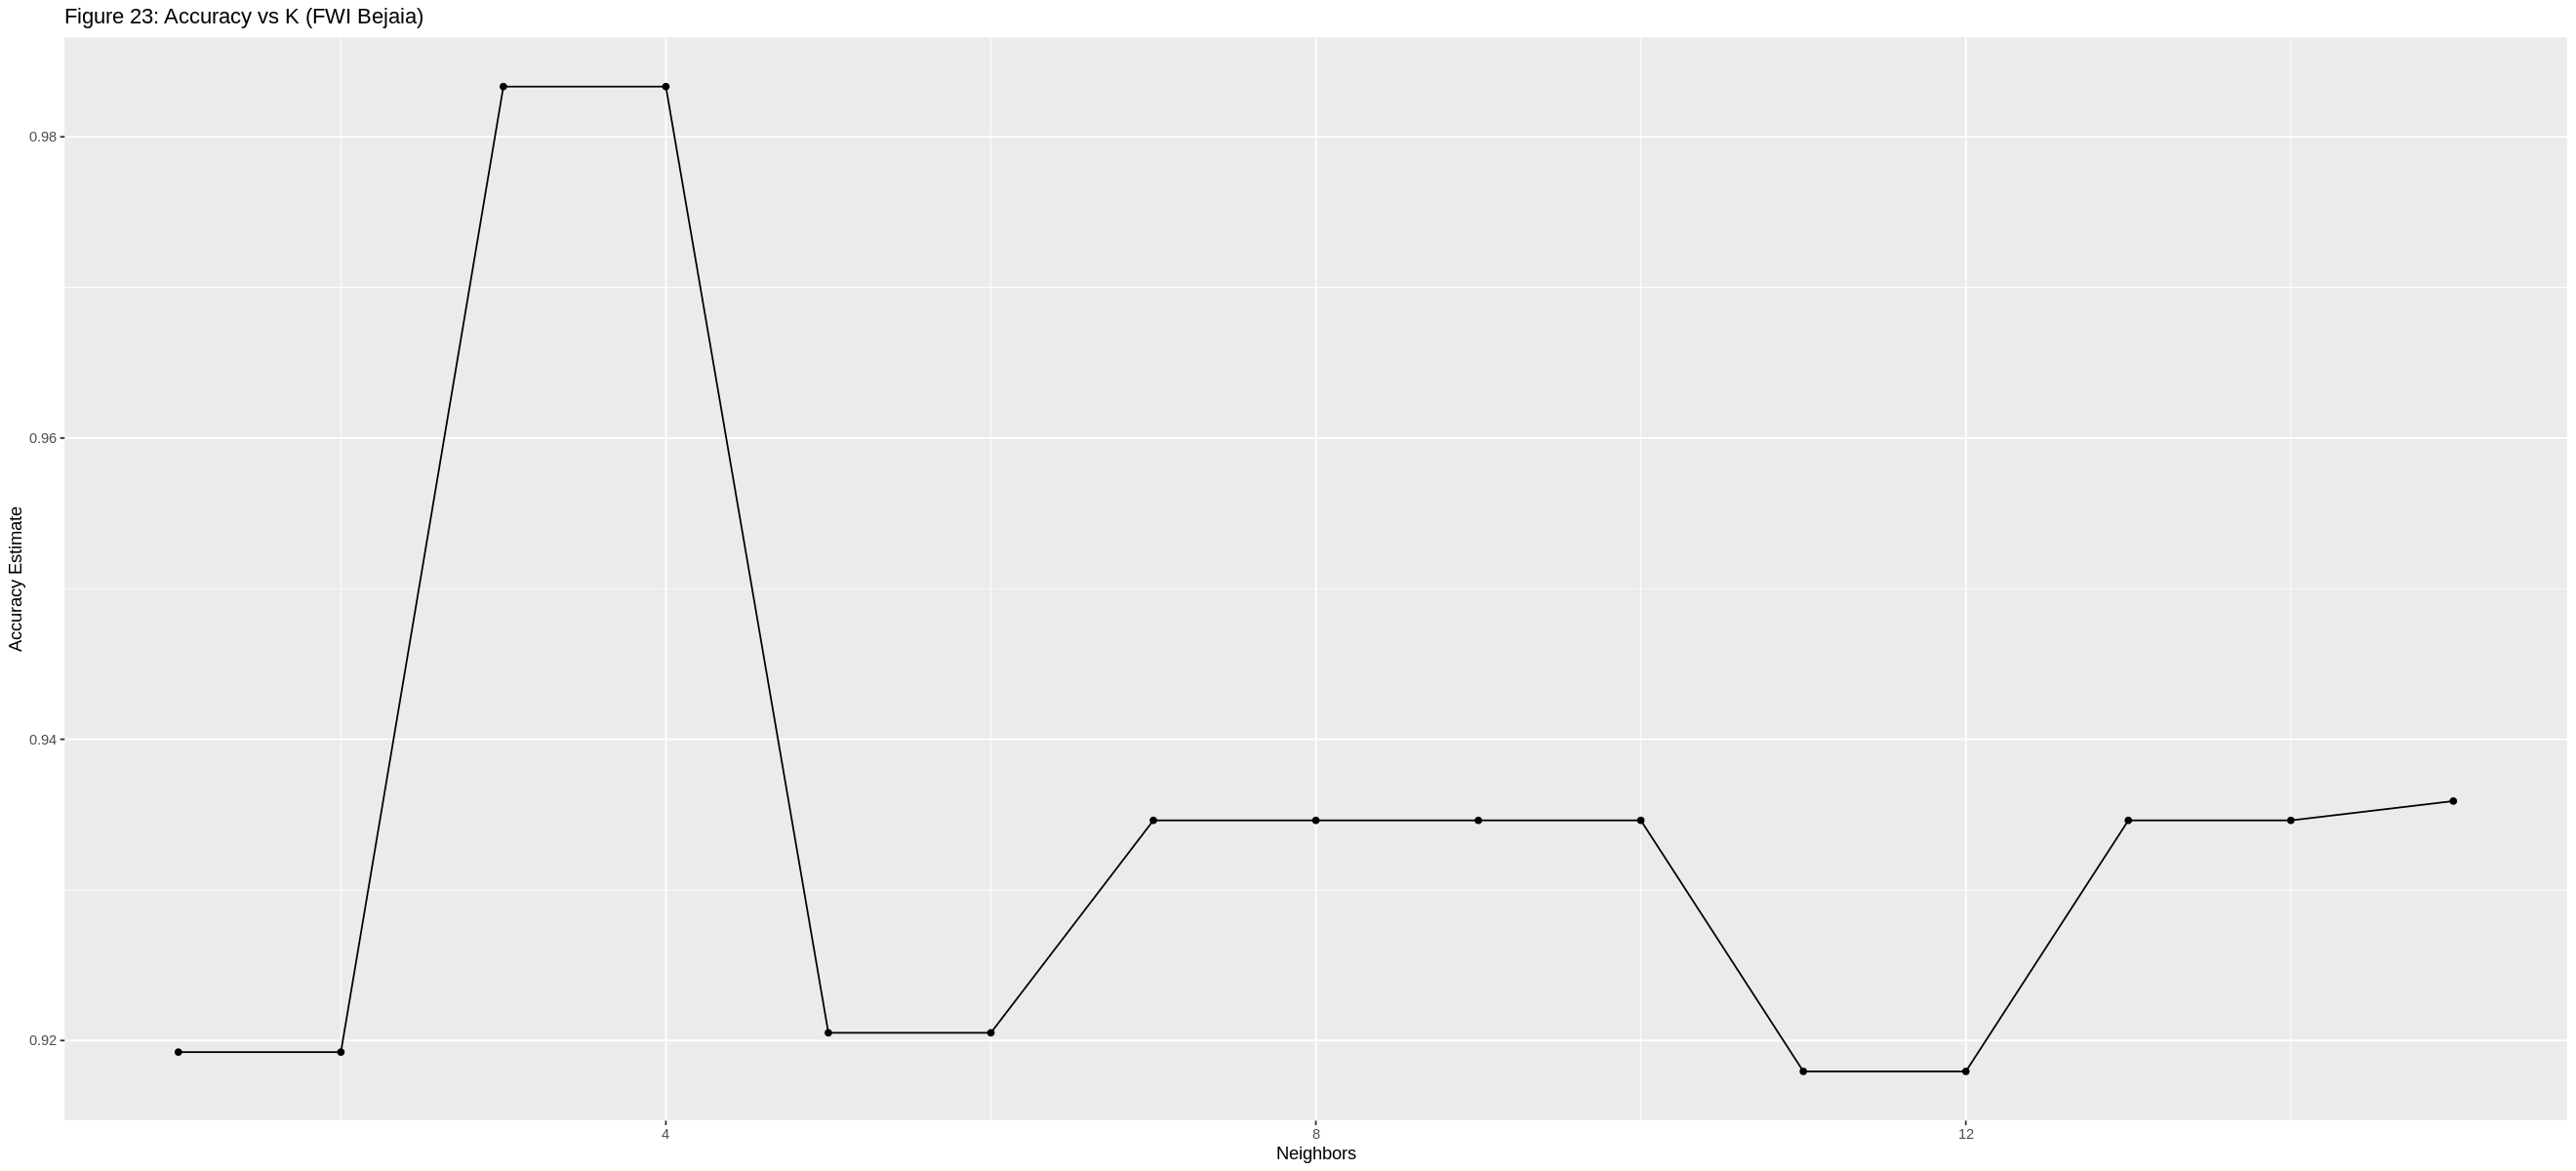

In [34]:
knn_results_tune_Bej_FWI <- workflow() %>%
  add_recipe(Bej_FWI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_FWI <- knn_results_tune_Bej_FWI %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_FWI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 23: Accuracy vs K (FWI Bejaia)")+
  scale_x_continuous()
accuracy_vs_k

According to the graph above the best k value is 3 with a predicted accuracy of 96%

Using k=3 we apply the retrained model onto the test data

In [35]:
Bej_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_FWI_Fit_C <- workflow() %>%
    add_recipe(Bej_FWI_recipe_scaled) %>%
    add_model(Bej_knn_spec_C) %>%
    fit(data=Bejaia_train)

Bej_FWI_prediction <- predict(Bej_FWI_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)
Bej_FWI_prediction_accuracy <- Bej_FWI_prediction %>%
    metrics(truth=Class, estimate= .pred_class)  %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
Bej_FWI_prediction_accuracy

[1] 0.9333333

We get an accuracy of 93% compared to a predicted accuracy of 96%

The next cell contains the scaled recipe for FWI on the Sidi Bel Abbes data set

In [36]:
SBA_FWI_recipe_scaled <- recipe(Classes ~ FWI + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The next cell determines the best k value

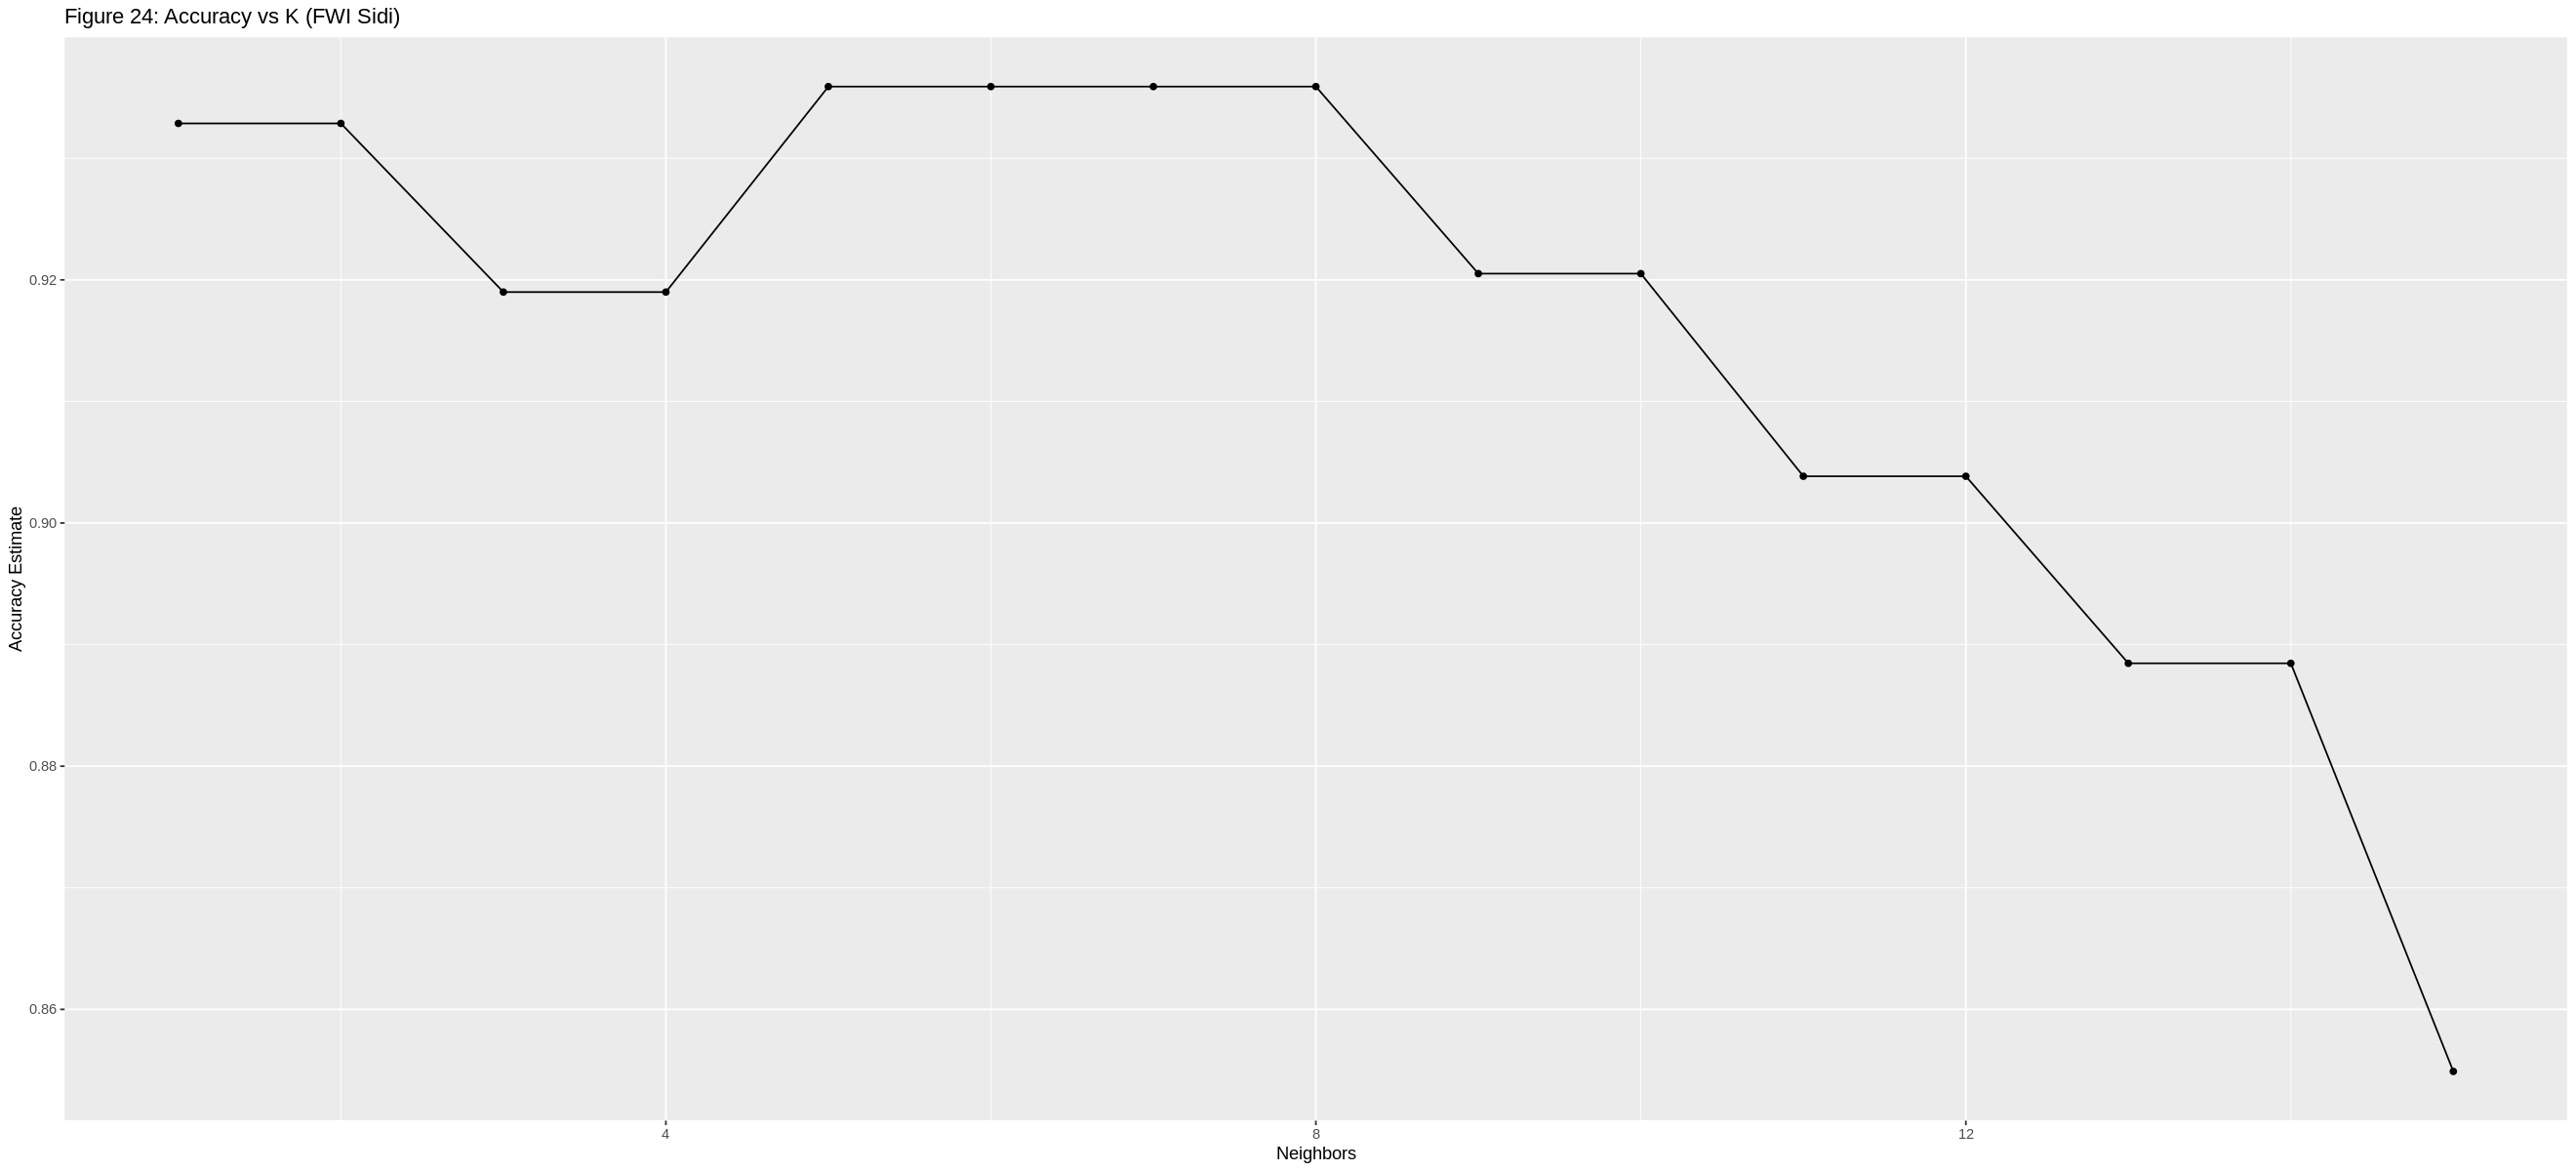

In [37]:
knn_results_tune_SBA_FWI <- workflow() %>%
  add_recipe(SBA_FWI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Sidi_vfold_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_SBA_FWI <- knn_results_tune_SBA_FWI %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_SBA_FWI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 24: Accuracy vs K (FWI Sidi)")+
  scale_x_continuous()
accuracy_vs_k

The graph predicts that k=5 will have the best accuracy of 93%

Using k=5 we apply the retrained model onto the Sidi Bel Abbes test data

In [38]:
SBA_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

SBA_FWI_Fit_C <- workflow() %>%
    add_recipe(SBA_FWI_recipe_scaled) %>%
    add_model(SBA_knn_spec_C) %>%
    fit(data=Sidi_Bel_Abbes_train)

SBA_FWI_prediction <- predict(SBA_FWI_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)
SBA_FWI_prediction_accuracy <- SBA_FWI_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)  %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
SBA_FWI_prediction_accuracy


[1] 0.9

A test accuracy of 90% compared to a predicted accuracy of 93%

The next cell contains the scaled recipe for ISI on the Bejaia data set

In [39]:
Bej_ISI_recipe_scaled <- recipe(Class ~ ISI + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The next cell plots accuracy vs k on the Bejaia training data.

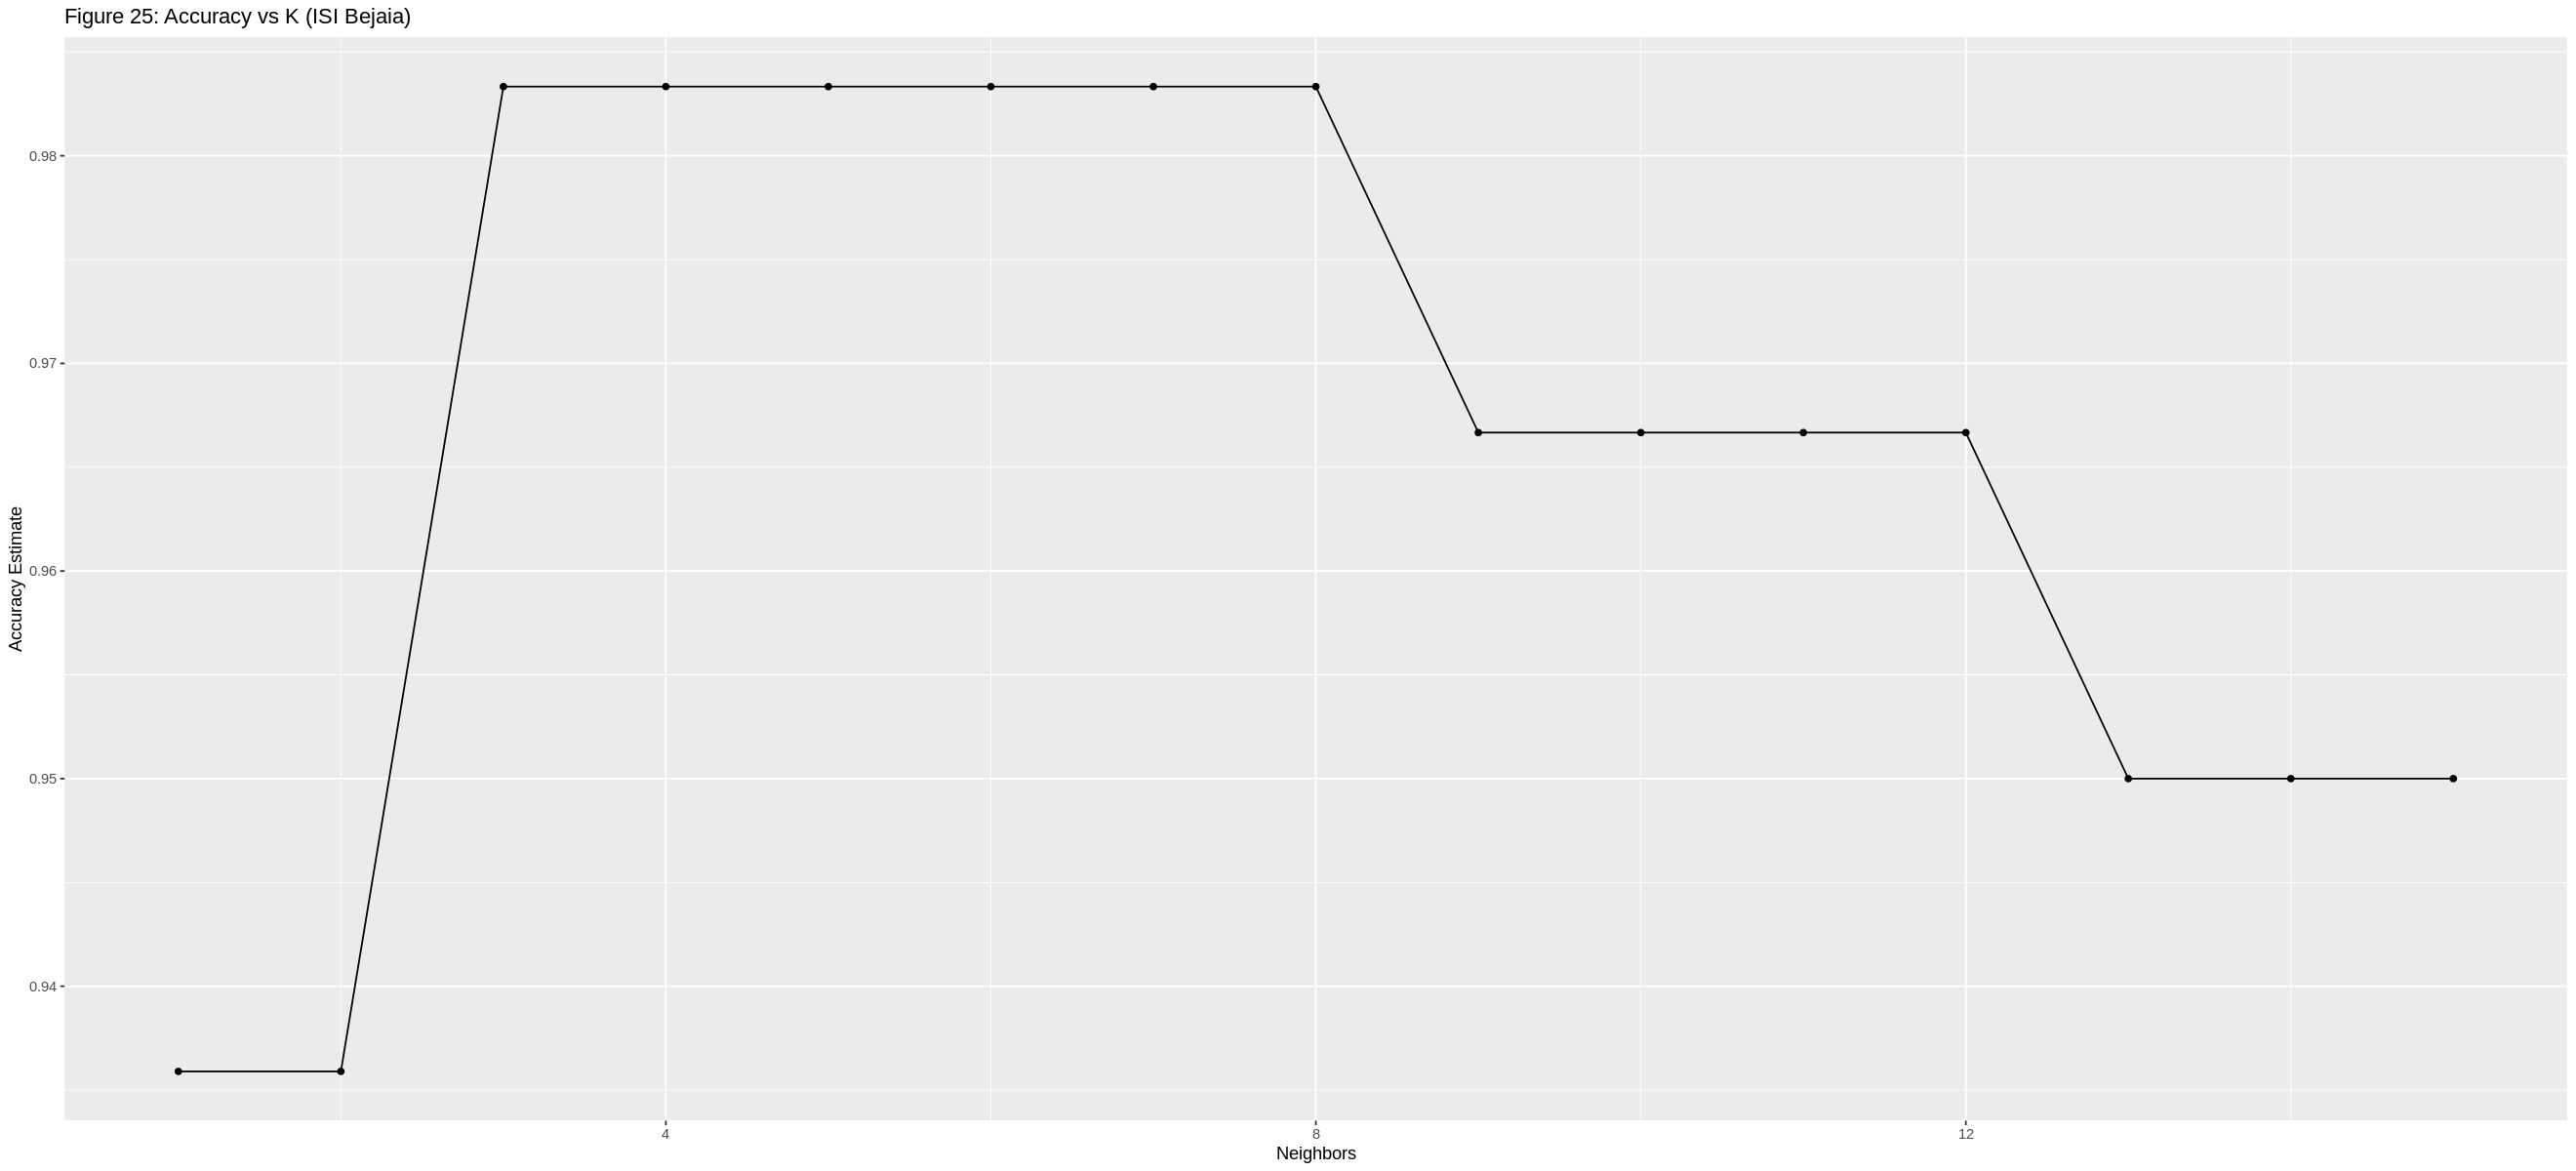

In [40]:
Bej_knn_results_tune_ISI <- workflow() %>%
  add_recipe(Bej_ISI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()
#Bej_knn_results_tune_ISI

accuracies_bej_ISI <- Bej_knn_results_tune_ISI %>%
  filter(.metric == "accuracy")

accuracy_vs_k_ISI <- ggplot(accuracies_bej_ISI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 25: Accuracy vs K (ISI Bejaia)")+
  scale_x_continuous()
accuracy_vs_k_ISI

The graph shows that k=3 with a predicted accuracy  of 98% is the best k value.

Using k=3 we retrain the model and apply it to the Bejaia test data.

In [41]:
Bej_knn_spec_ISI <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_ISI_Fit <- workflow() %>%
    add_recipe(Bej_ISI_recipe_scaled) %>%
    add_model(Bej_knn_spec_ISI) %>%
    fit(data=Bejaia_train)

Bej_ISI_prediction <- predict(Bej_ISI_Fit, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_ISI_prediction_accuracy <- Bej_ISI_prediction %>%
    metrics(truth=Class, estimate= .pred_class)  %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
Bej_ISI_prediction_accuracy

[1] 0.9333333

A test accuracy of 93% compared to a predicted accuracy of 98%.

The next cell contains the scaled recipe for ISI on the Sidi Bel Abbes data set.

In [42]:
Sidi_ISI_recipe_scaled <- recipe(Classes ~ ISI + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The next cell illustrates the optimal K value.

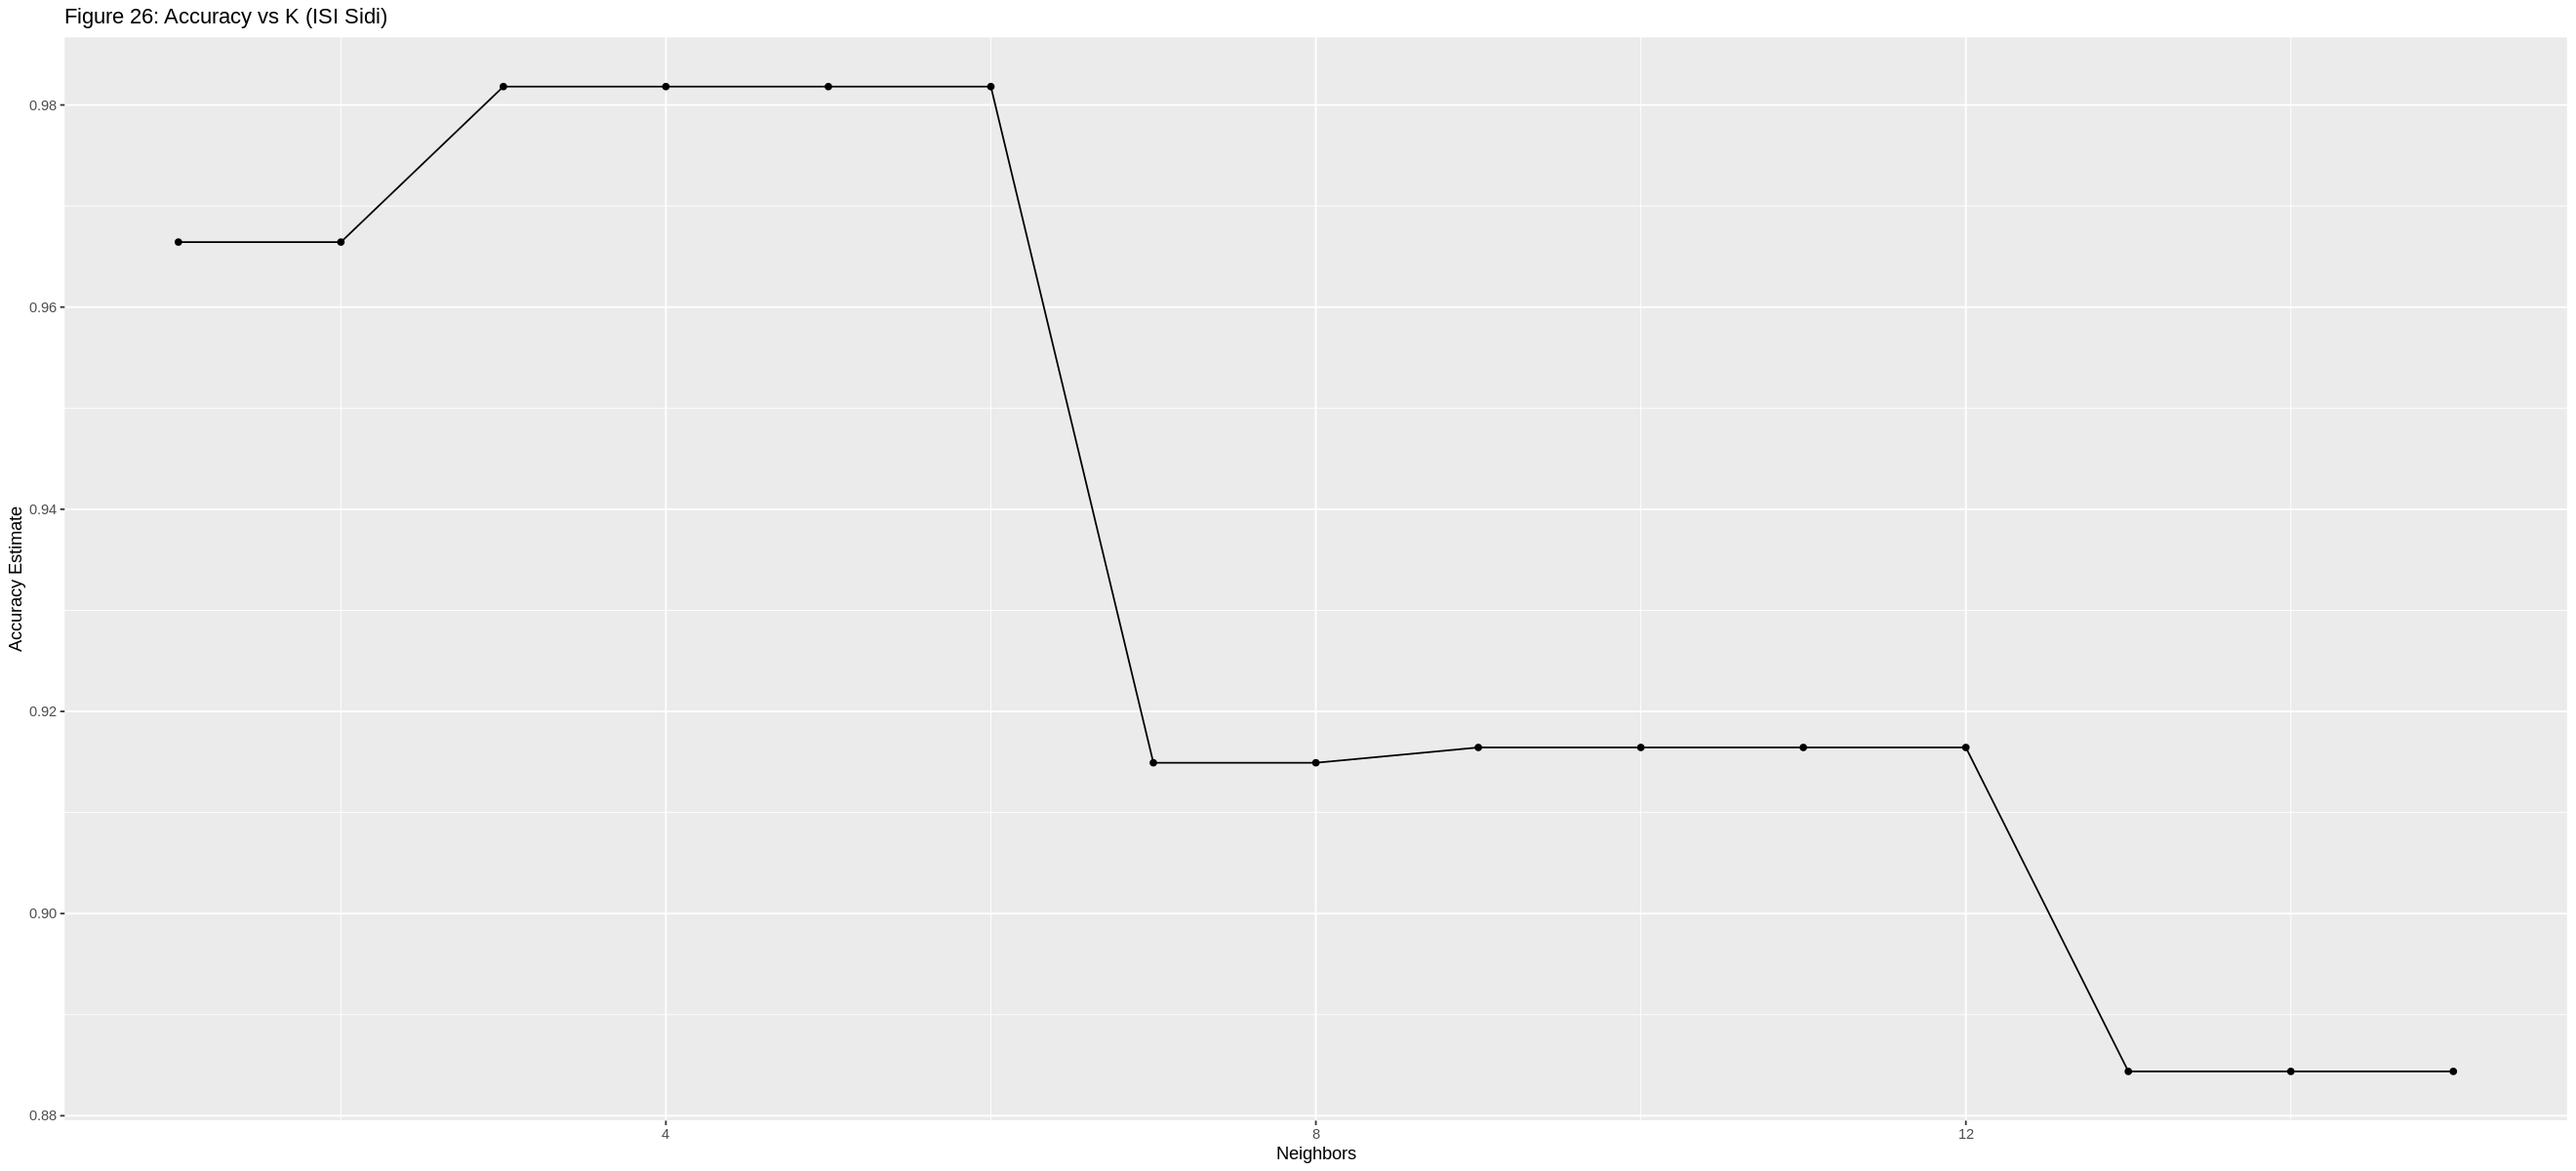

In [43]:

Sidi_knn_results_tune_ISI <- workflow() %>%
  add_recipe(Sidi_ISI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Sidi_vfold_C , grid = k_vals) %>%
  collect_metrics()
#Sidi_knn_results_tune_ISI

accuracies_Sidi_ISI <- Sidi_knn_results_tune_ISI %>%
  filter(.metric == "accuracy")

Sidi_accuracy_vs_k_ISI <- ggplot(accuracies_Sidi_ISI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 26: Accuracy vs K (ISI Sidi)")+
  scale_x_continuous()
Sidi_accuracy_vs_k_ISI




The graph indicates that k=3 is the best option with an estimated accuracy of 96%.

Using k=3 we retrain the model and apply it to the Bejaia test data to obtain the test accuracy.

In [44]:
Sidi_knn_spec_ISI <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_ISI_Fit <- workflow() %>%
    add_recipe(Sidi_ISI_recipe_scaled) %>%
    add_model(Sidi_knn_spec_ISI) %>%
    fit(data=Sidi_Bel_Abbes_train)

Sidi_ISI_prediction <- predict(Sidi_ISI_Fit, Sidi_Bel_Abbes_test ) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_ISI_prediction_accuracy <- Sidi_ISI_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)   %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
Sidi_ISI_prediction_accuracy

[1] 0.9

A test accuracy of 90% vs an estimated accuracy of 96%

The next cell contains the scaled recipe for Temperature on the Bejaia data set.

In [45]:
Bej_Tem_recipe_scaled <- recipe(Class ~ Temperature + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The next cell plots the accuracy of each k value

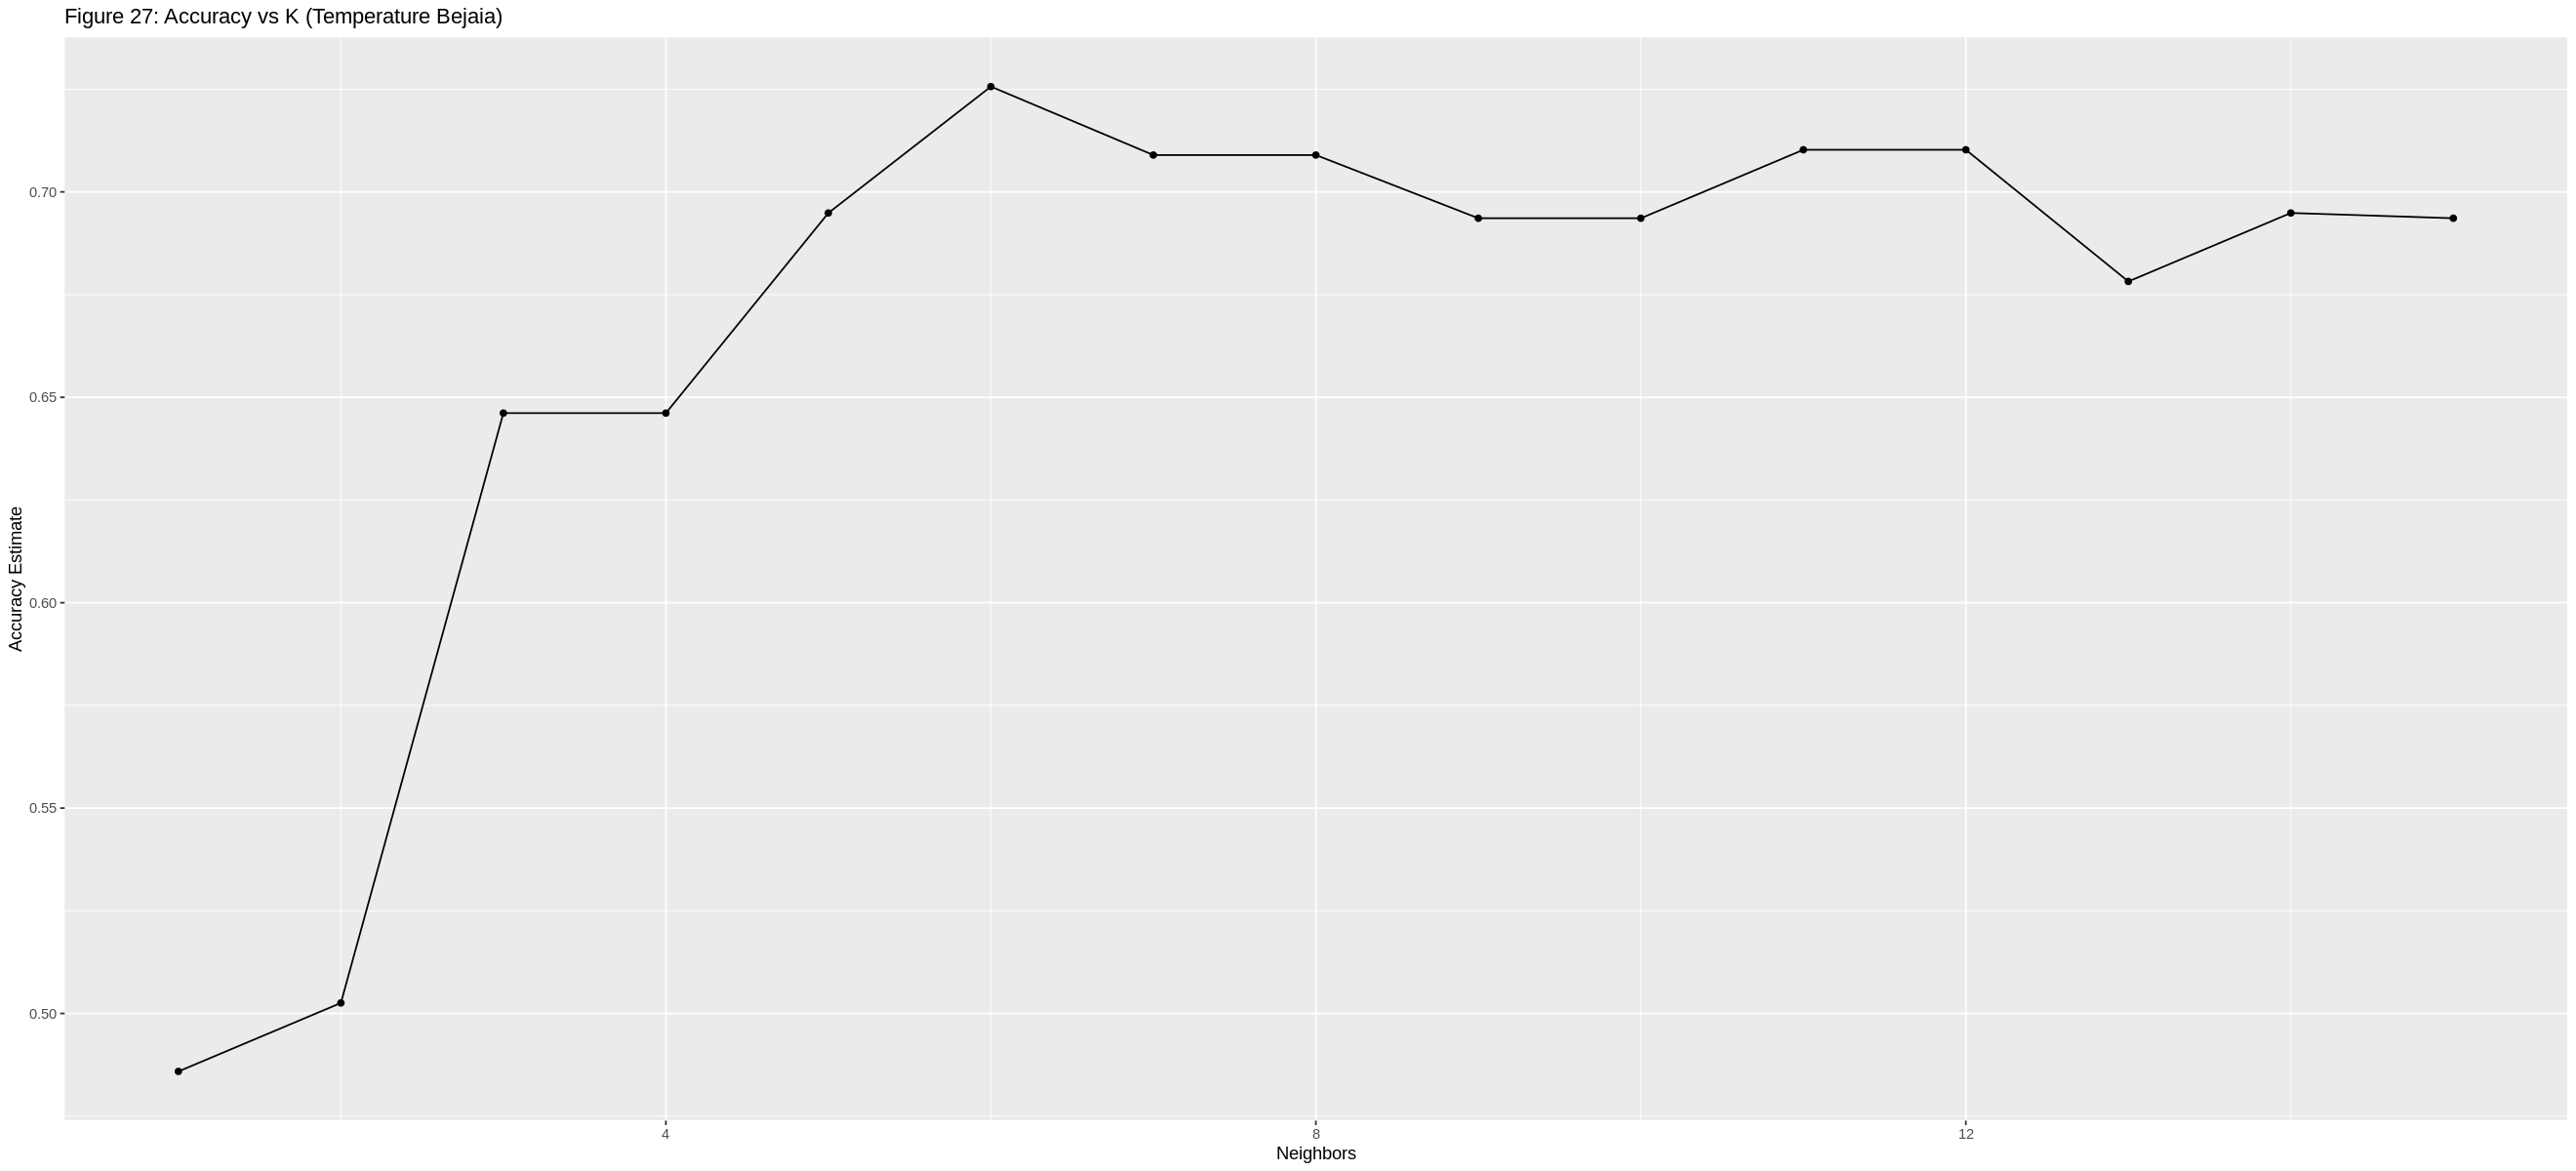

In [46]:

knn_Tem_results_tune <- workflow() %>%
  add_recipe(Bej_Tem_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_bej_Tem <- knn_Tem_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_Tem, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 27: Accuracy vs K (Temperature Bejaia)")+
  scale_x_continuous()
accuracy_vs_k


From the graph we can tell that the optimal k value would be 6 but we want an odd number so the k we chose is 7 with a estimated accuracy of 72.5%.

Using k=7 we retrain the model and apply it to the Bejaia test data to obtain the test accuracy.

In [47]:
Bej_knn_spec_Tem_C <- nearest_neighbor(weight_func="rectangular", neighbors=7) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_Tem_Fit_C <- workflow() %>%
    add_recipe(Bej_Tem_recipe_scaled) %>%
    add_model(Bej_knn_spec_Tem_C) %>%
    fit(data=Bejaia_train)

Bej_Tem_prediction <- predict(Bej_Tem_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)


Bej_Tem_prediction_accuracy <- Bej_Tem_prediction %>%
    metrics(truth=Class, estimate= .pred_class)  %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
Bej_Tem_prediction_accuracy


[1] 0.7166667

The test accuracy is 72% compared to the estimated accuracy of 72.5 %.

The next cell has the recipe for temperature on the Sidi Bel Abbes dataset.

In [48]:
Sidi_Temp_recipe_scaled <- recipe(Classes ~ Temperature + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The next cell plots the estimated accuracies vs the k values.

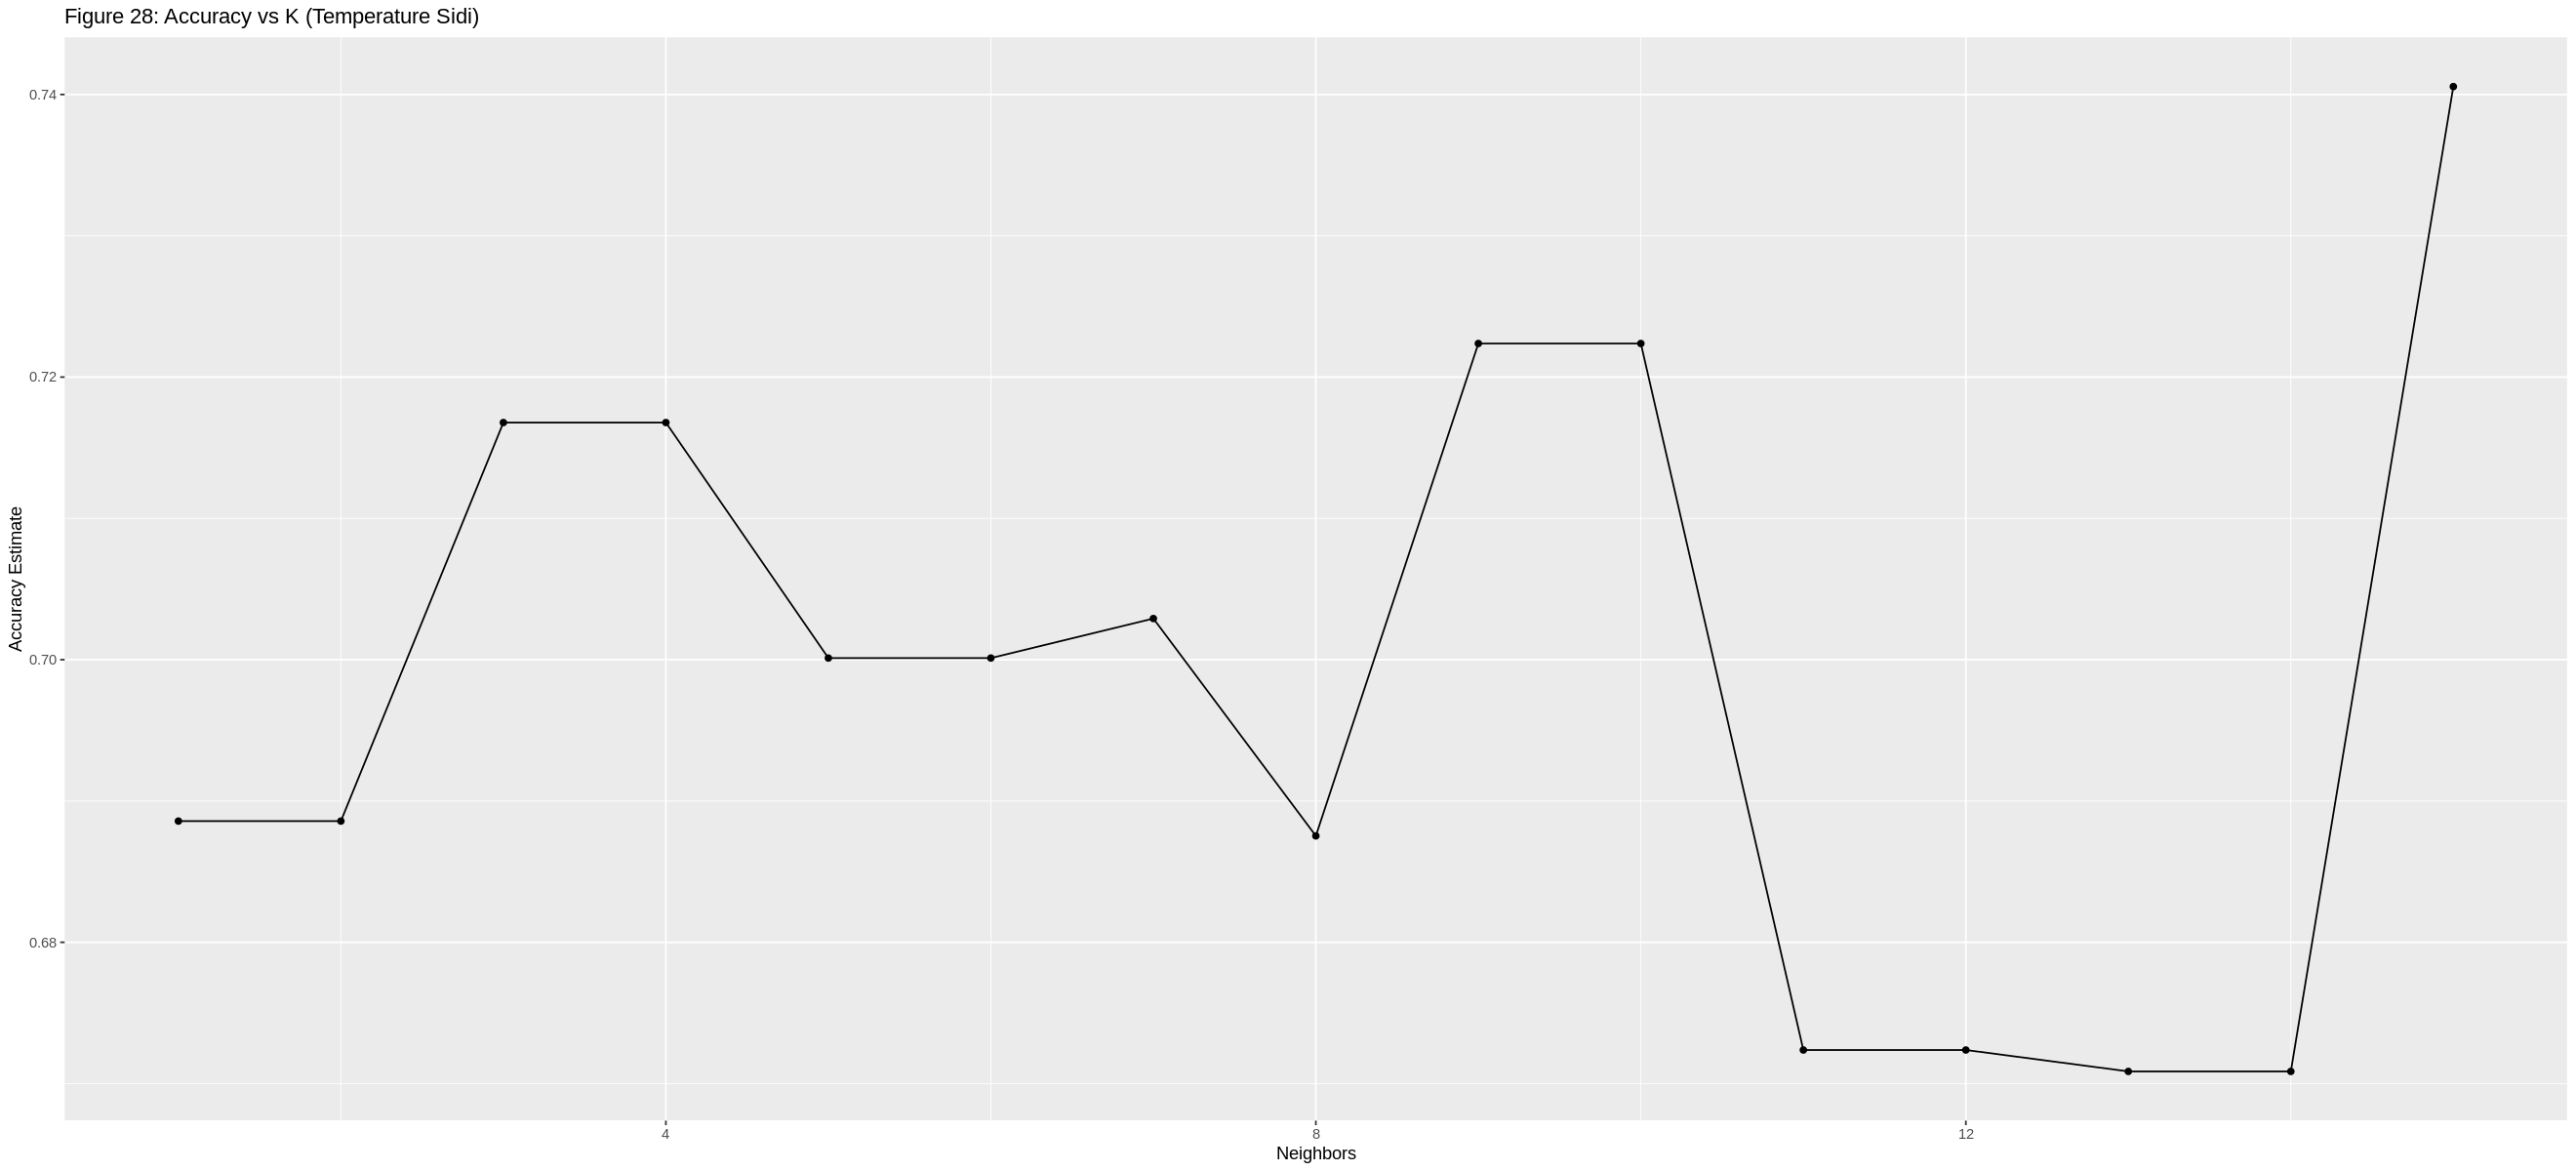

In [49]:
Sidi_knn_results_tune_Temp <- workflow() %>%
  add_recipe(Sidi_Temp_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Sidi_vfold_C , grid = k_vals) %>%
  collect_metrics()
#Sidi_knn_results_tune_Temp

accuracies_Sidi_Temp <- Sidi_knn_results_tune_Temp %>%
  filter(.metric == "accuracy")

Sidi_accuracy_vs_k_Temp <- ggplot(accuracies_Sidi_Temp, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate",title="Figure 28: Accuracy vs K (Temperature Sidi)")+
  scale_x_continuous()
Sidi_accuracy_vs_k_Temp

The k value of 15 with an estimated accuracy of 74% is the optimal choice.

Using k=15 we retrain the model and pull the test data accuracy.

In [51]:
Sidi_knn_spec_Temp <- nearest_neighbor(weight_func="rectangular", neighbors=15) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_Temp_Fit <- workflow() %>%
    add_recipe(Sidi_Temp_recipe_scaled) %>%
    add_model(Sidi_knn_spec_Temp) %>%
    fit(data=Sidi_Bel_Abbes_train)

Sidi_Temp_prediction <- predict(Sidi_Temp_Fit, Sidi_Bel_Abbes_test ) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_Temp_prediction_accuracy <- Sidi_Temp_prediction %>%
    metrics(truth=Classes, estimate= .pred_class) %>%
    filter(.metric=="accuracy") %>%
    select(.estimate) %>%
    pull(.estimate)
Sidi_Temp_prediction_accuracy 


[1] 0.75

A accuracy of 75% vs the estimated accuracy of 74%. 

In [53]:
FFMC_accuracy_average <- (Sidi_FFMC_prediction_accuracy + Bej_FFMC_prediction_accuracy) *50
rain_accuracy_average <- (SBA_Rain_prediction_accuracy+ Bej_Rain_prediction_accuracy) *50
FWI_accuracy_average<- (SBA_FWI_prediction_accuracy +Bej_FWI_prediction_accuracy) *50
ISI_accuracy_average<- (Sidi_ISI_prediction_accuracy +Bej_ISI_prediction_accuracy ) *50
Temp_accuracy_average<- (Sidi_Temp_prediction_accuracy + Bej_Tem_prediction_accuracy)*50

FFMC_accuracy_average 
rain_accuracy_average
FWI_accuracy_average
ISI_accuracy_average 
Temp_accuracy_average

[1] 93.33333

[1] 79.16667

[1] 91.66667

[1] 91.66667

[1] 73.33333

We calculate the average accuracy of each variable across both data sets to optain the overall accuracy for each variable.

Expected outcomes and significance:

 In this study we expect to discover a relationship between the most contributing atmospheric condition(s) of the area to the presence of fire. If we can determine a reliable relationship we can attempt to predict areas with a high likelihood of fire. This information can alos allow proper allocation of fire fighting resources to vulnerable areas. We hope our findings can lead to a better understanding of how and why fires occur in forests and how the changing global climate will affect the location and frequency of forest fires.
    